# importing libraries

In [1]:
#importing libraries

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)

# read application csv

In [3]:
app_data=pd.read_csv("application_data.csv")
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# data inspection on application dataset

## get info and shape on dataset 

In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## data quality check

In [5]:
pd.set_option("display.max_rows",200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

-we can see that majority colums have null values above 47% which might give a wrong insight. hence drop them

## dropping colums with missing values greater than 47%

In [6]:
percentage=47
threshold = int(((100-percentage)/100)*app_data.shape[0]+1)
app_df = app_data.dropna(axis=1, thresh=threshold)
app_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0

In [7]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

# impute missing values

In [8]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## imputing OCCUPATION_TYPE(31%)

In [9]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [10]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [11]:
app_df.OCCUPATION_TYPE.fillna("others",inplace=True)
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

## imputing EXT_SOURCE_3(19%)

In [12]:
app_df.EXT_SOURCE_3.isnull().mean()*100

19.825307062186393

In [13]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.021492    0.000406
0.019468    0.000406
0.023062    0.000406
0.014556    0.000406
0.043227    0.000406
Name: EXT_SOURCE_3, Length: 814, dtype: float64

In [14]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

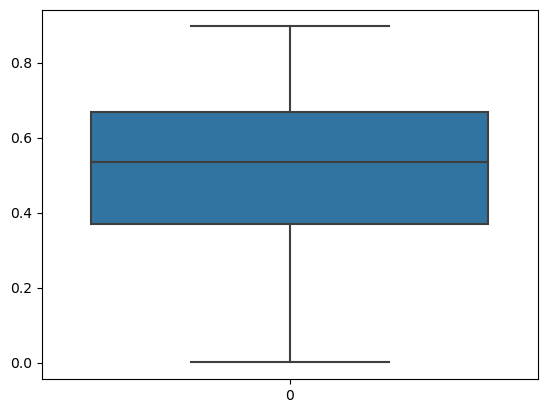

In [15]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

In [16]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)

### handling data with greater than 13%(could find 5-6 colums with 13% and rest all are neglegiable)

In [17]:
null_cols=list(app_df.columns[app_df.isna().any()])
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [18]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [19]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

- Conclusion :we could see that 99% of values in the colums AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR is 0.0. Hence impute these with mode

In [20]:
cols=["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
for col in cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace=True)
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


## handling values which have null values less than 1%

In [21]:
null_cols=list(app_df.columns[app_df.isna().any()])
null_cols

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [22]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [23]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [24]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
29.0      0.000326
47.0      0.000326
348.0     0.000326
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

### Imputing categorial colums with mode and  numeric colums with median

#### categorical

In [25]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [26]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0],inplace=True)

#### numerical

In [27]:
null_cols=list(app_df.columns[app_df.isna().any()])
null_cols

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [28]:
for col in null_cols:
    app_df[col].fillna(app_df[col].median(),inplace=True)
app_df.isnull().median()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

   # Binning of continous variables
   
   ## standardizing days colums in Years for wasy bining

In [29]:
app_df["YEARS_BIRTH"] =abs( app_df["DAYS_BIRTH"].apply(lambda x: int(x // 365)))
app_df["YEARS_EMPLOYED"] = abs(app_df["DAYS_EMPLOYED"].apply(lambda x: int(x // 365)))
app_df["YEARS_ID_PUBLISH"] =abs( app_df["DAYS_ID_PUBLISH"].apply(lambda x: int(x // 365)))
app_df["YEARS_EMPLOYED"] = abs(app_df["DAYS_REGISTRATION"].apply(lambda x: int(x // 365)))
app_df["YEARS_LAST_PHONE_CHANGE"] = abs(app_df["DAYS_LAST_PHONE_CHANGE"].apply(lambda x: int(x // 365)))

## binning of amount credit

In [30]:
app_df.AMT_CREDIT.value_counts(normalize= True)*100

450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: AMT_CREDIT, Length: 5603, dtype: float64

In [31]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [32]:
app_df["AMT_CREDIT_CATEGORY"]=pd.cut(app_df.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],labels=['very_low_credit','low_credit','medium_credit','high_credit','very_high_credit'])
app_df.AMT_CREDIT_CATEGORY.value_counts(normalize=True)*100

low_credit          31.511770
medium_credit       25.733324
high_credit         16.791314
very_low_credit     14.035088
very_high_credit    11.928504
Name: AMT_CREDIT_CATEGORY, dtype: float64

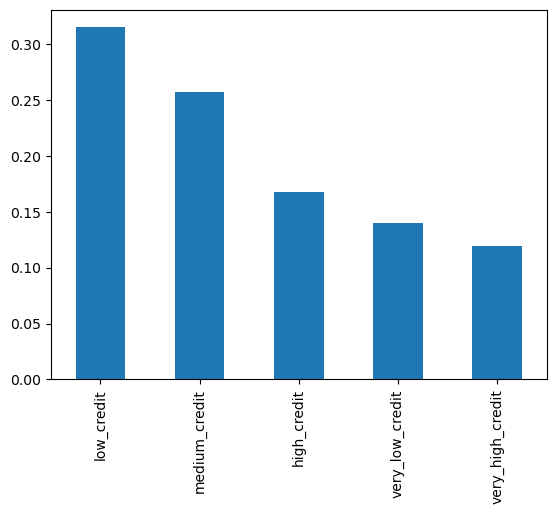

In [33]:
app_df.AMT_CREDIT_CATEGORY.value_counts(normalize=True).plot.bar()
plt.show()

In [34]:
app_df["AGE_CATEGORY"]=pd.cut(app_df.YEARS_BIRTH,[0,25,45,65,85],labels=['below_25','25-45','45-65','65-85'])
app_df.AGE_CATEGORY.value_counts(normalize=True)*100


25-45       50.917203
45-65       42.493764
below_25     3.954005
65-85        2.635028
Name: AGE_CATEGORY, dtype: float64

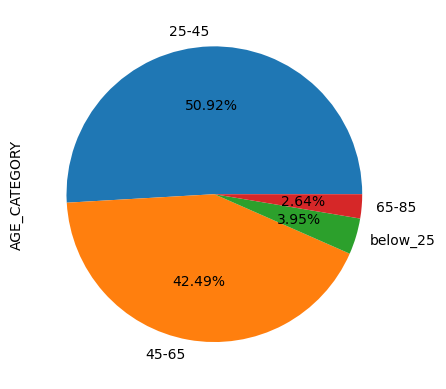

In [35]:
app_df.AGE_CATEGORY.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

In [36]:
# major are in between 25,65 soo narrowing it down
app_df["AGE_CATEGORY"]=pd.cut(app_df.YEARS_BIRTH,[0,25,35,45,55,65,85],labels=['below_25','25-35','35-45','45-55','55-65','65-85'])
app_df.AGE_CATEGORY.value_counts(normalize=True)*100


35-45       27.405199
25-35       23.512004
45-55       22.788453
55-65       19.705311
below_25     3.954005
65-85        2.635028
Name: AGE_CATEGORY, dtype: float64

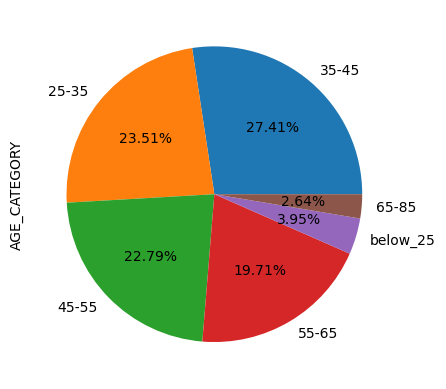

In [37]:
app_df.AGE_CATEGORY.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

In [38]:
app_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_CATEGORY,AGE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,10,6,4,medium_credit,25-35
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,1,3,NaN,45-55
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,12,7,3,very_low_credit,45-55
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,27,7,2,low_credit,45-55
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,12,10,4,medium_credit,45-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.535276,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,

## dividing app_df with tagret database as 0,1

In [39]:
tar_0=app_df[app_df.TARGET==0]
tar_1=app_df[app_df.TARGET==1]

# univariate analysis

In [40]:
cat_cols=list(app_df.columns[app_df.dtypes==np.object])
num_cols=list(app_df.columns[app_df.dtypes==np.int64])+list(app_df.columns[app_df.dtypes==np.float64])
cat_cols,num_cols

(['NAME_CONTRACT_TYPE',
  'CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'OCCUPATION_TYPE',
  'WEEKDAY_APPR_PROCESS_START',
  'ORGANIZATION_TYPE'],
 ['SK_ID_CURR',
  'TARGET',
  'CNT_CHILDREN',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'DAYS_ID_PUBLISH',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'REGION_RATING_CLIENT',
  'REGION_RATING_CLIENT_W_CITY',
  'HOUR_APPR_PROCESS_START',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FLAG_DOCUMENT_12',
  'FLAG_DOC

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


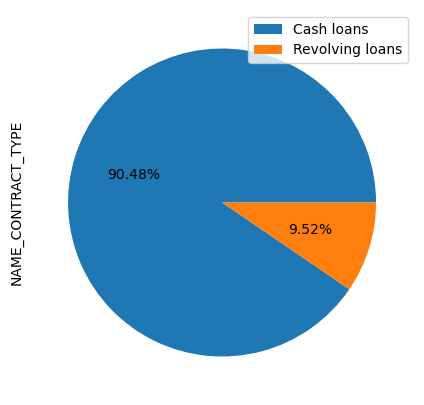

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


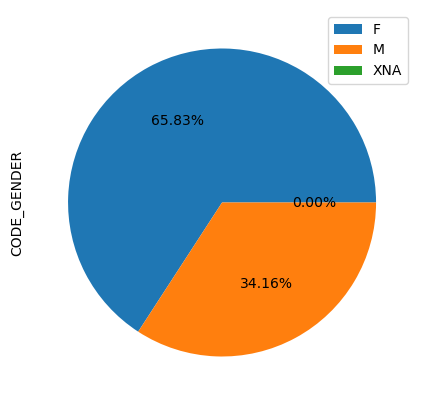

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


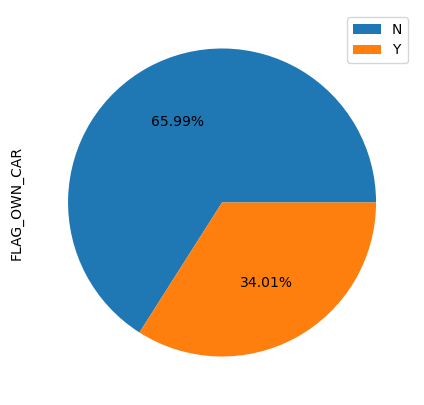

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


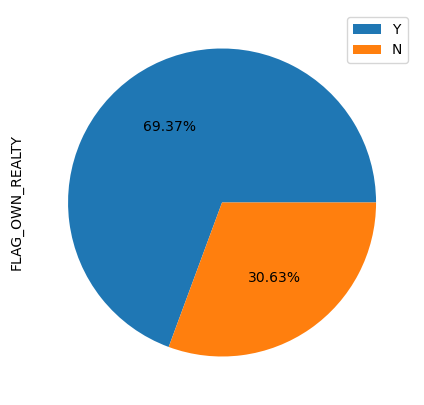

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64


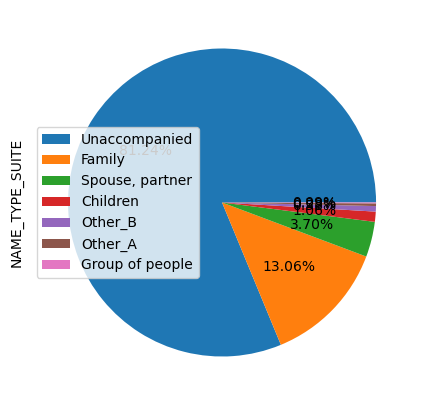

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


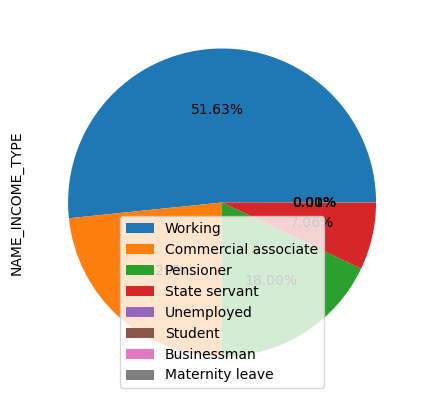

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


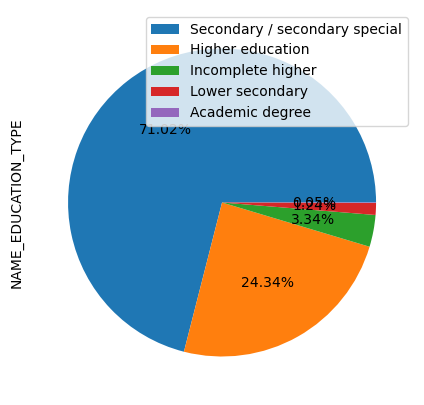

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


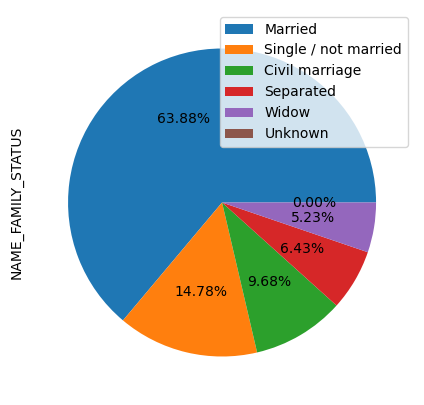

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


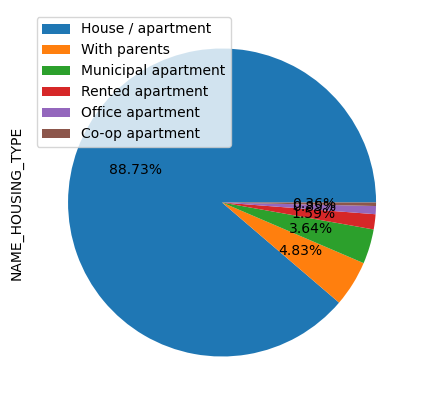

others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


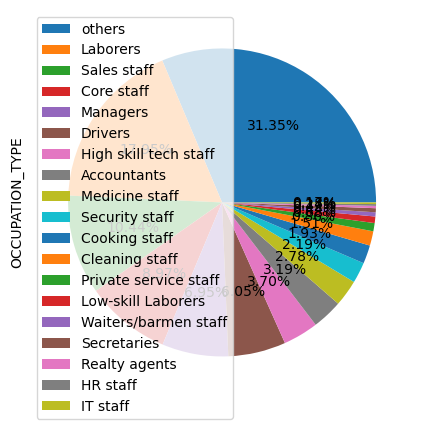

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


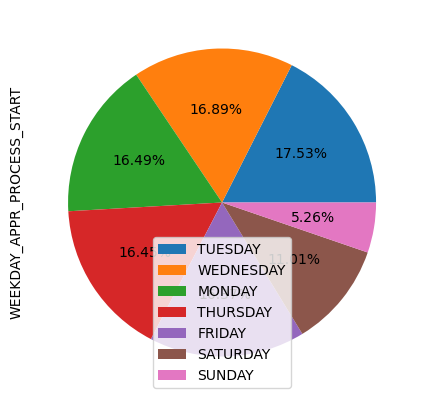

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

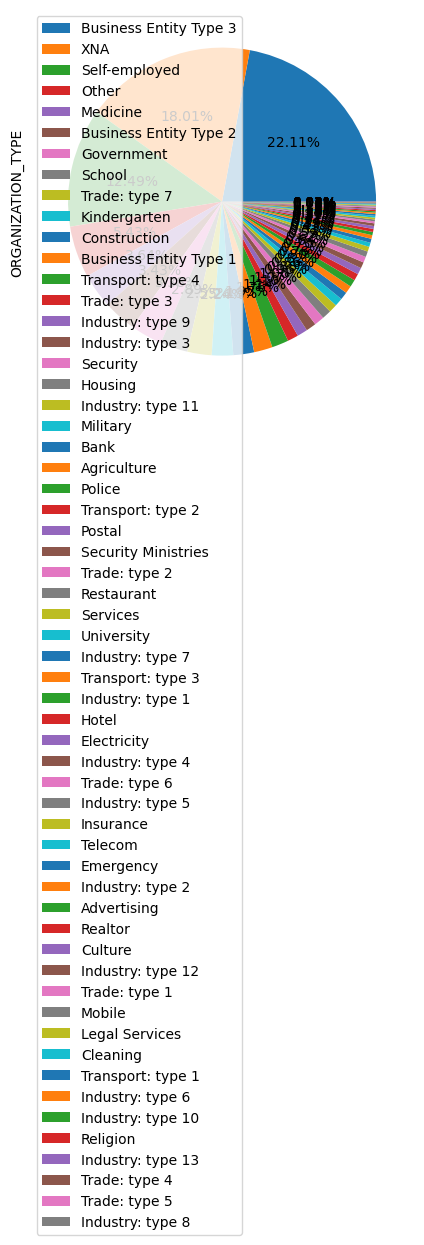

In [41]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
    plt.legend()
    plt.show()

- NAME_CONTRACT_TYPE: most people have cash loans than revolving laons
- CODE_GENDER: number of female applicants is twice the number of male applicants
- FLAG_OWN_CAR: most applicants do not own a car
- FLAG_OWN_REALTY: most applicants donot own a reality
- NAME_TYPE_SUITE: most applicants are unaccompanies
- NAME_INCOME_TYPE: more than 50% applicants income type is working
- NAME_EDUCATION_TYPE: almost 70% of the applicants have studies till secondary/secondary special
- NAME_FAMILY_STATUS:63% of the aplicants are married
- NAME_HOUSING_TYPE: almost 90% applicants live in a house/apartment
- OCCUPATION_TYPE: occupation type has a very distrubited share where labourers are leading with 17%
- WEEKDAY_APPR_PROCESS_START: there is a equal share among all days but sunday lagging behind with 5%
- ORGANIZATION_TYPE: most applivcants work in business entity type 3 category of companies

## plotting on numerical colums
### catogorising wrt flags

In [42]:
num_col_withflag=[]
num_col_withoutflag=[]
for col in num_cols:
    if col.startswith("FLAG"):
        num_col_withflag.append(col)
    else:
        num_col_withoutflag.append(col)        

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


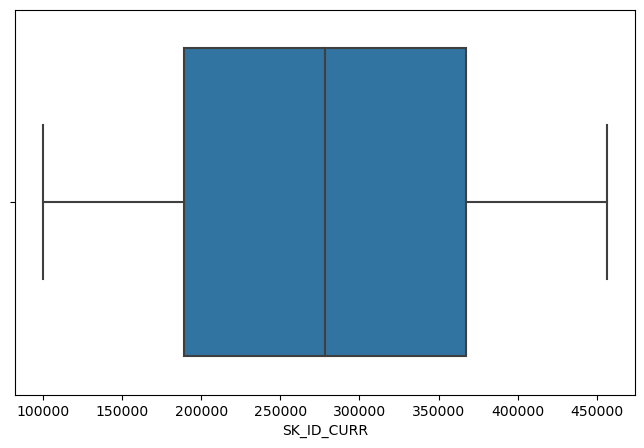

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


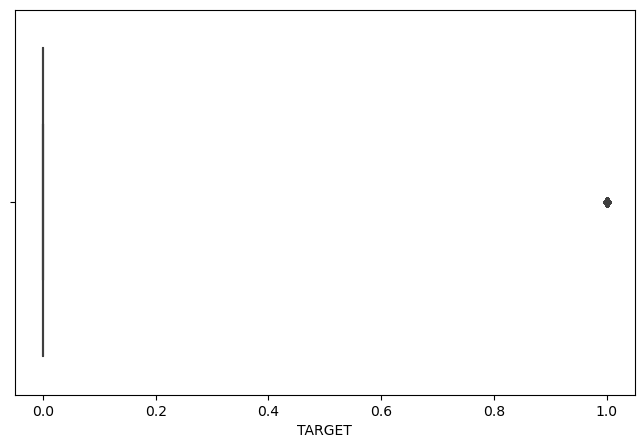

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


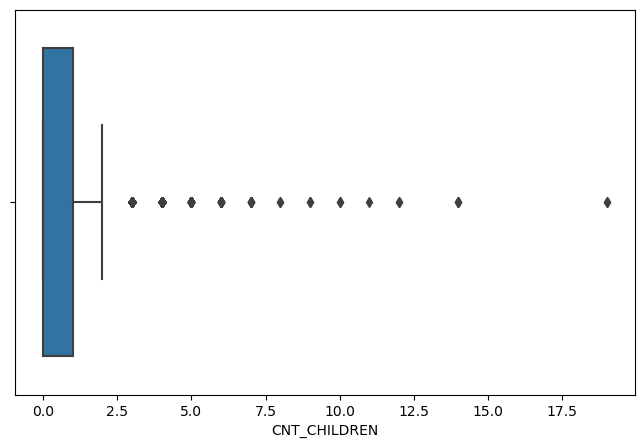

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


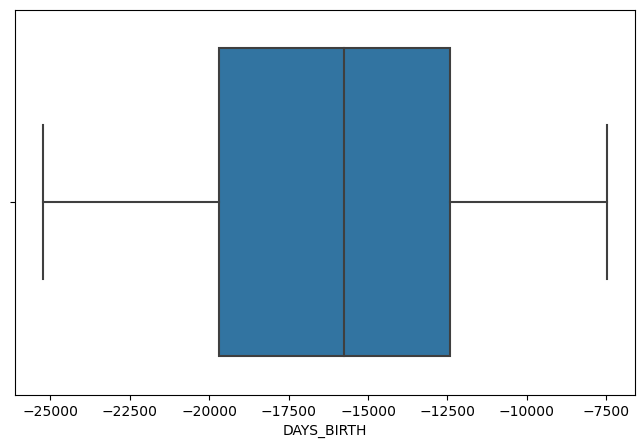

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


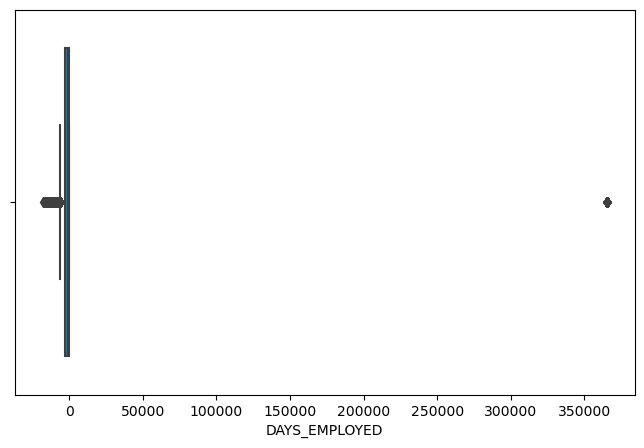

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


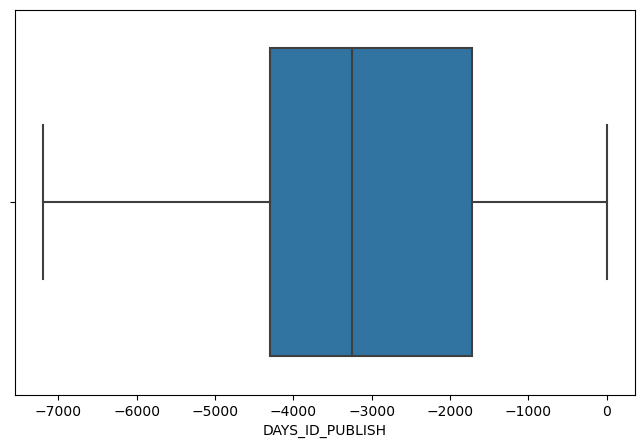

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


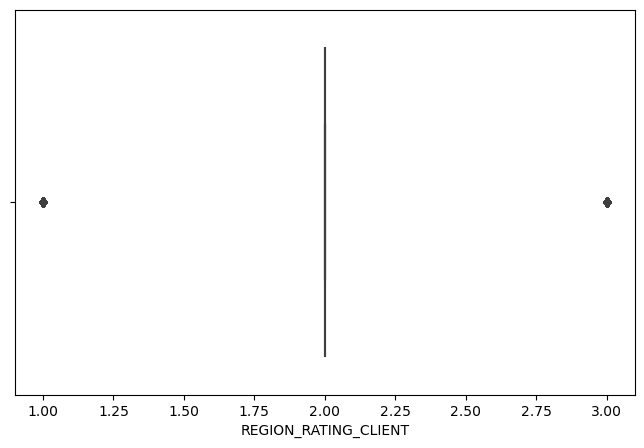

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


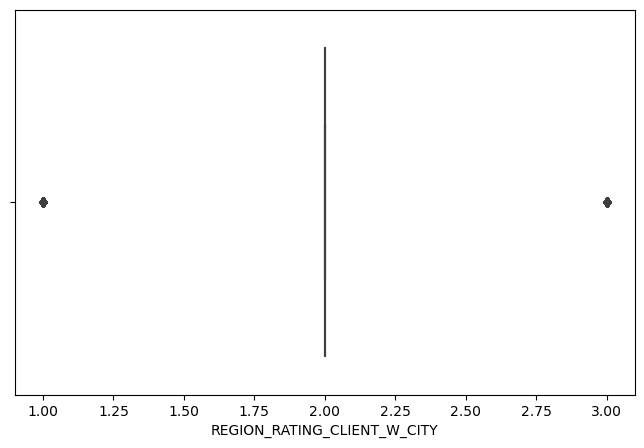

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


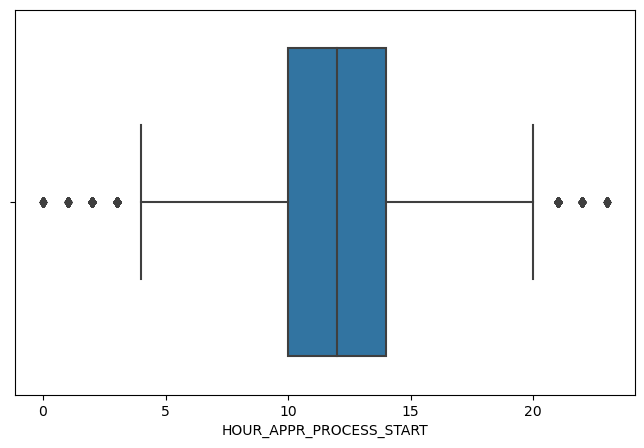

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


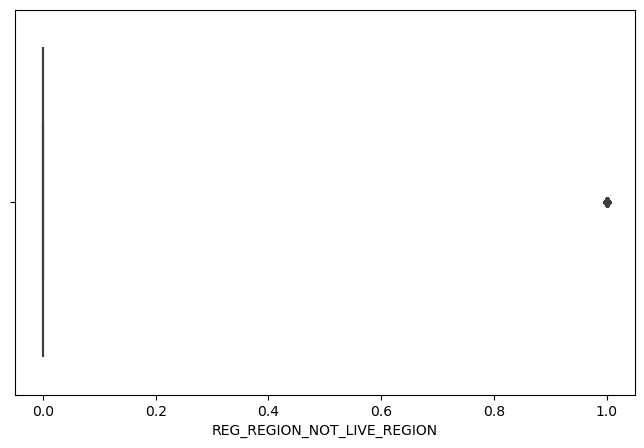

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


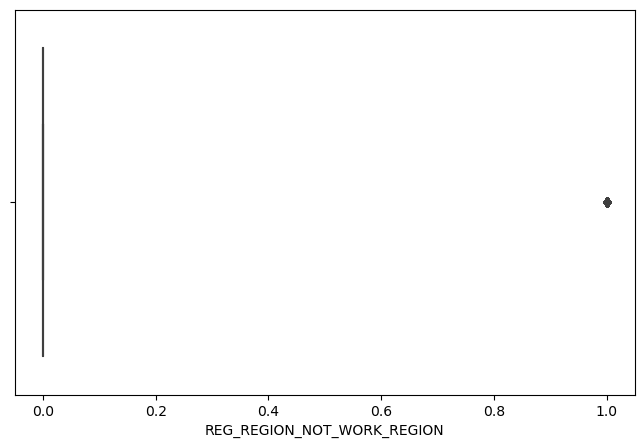

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


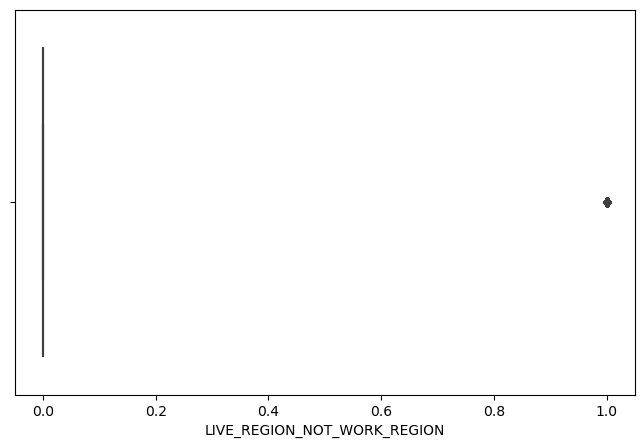

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


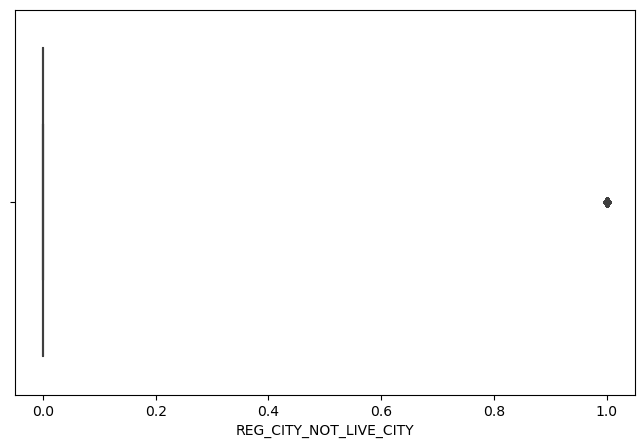

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


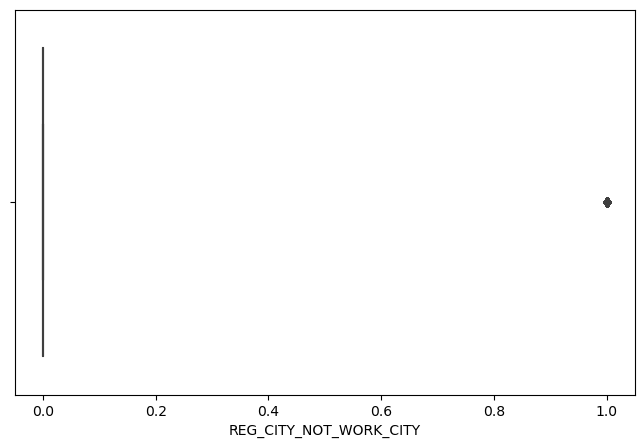

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


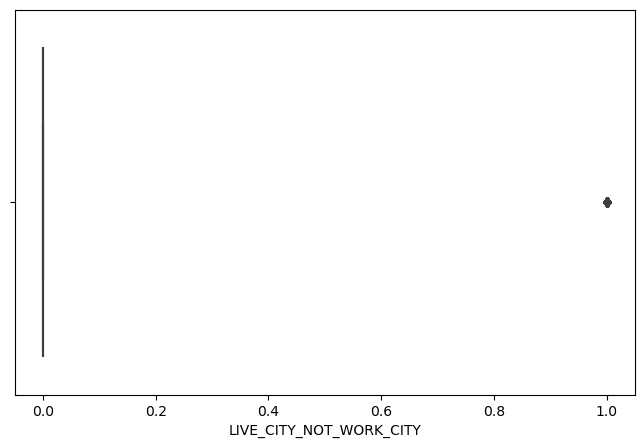

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean         44.433090
std          11.954493
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


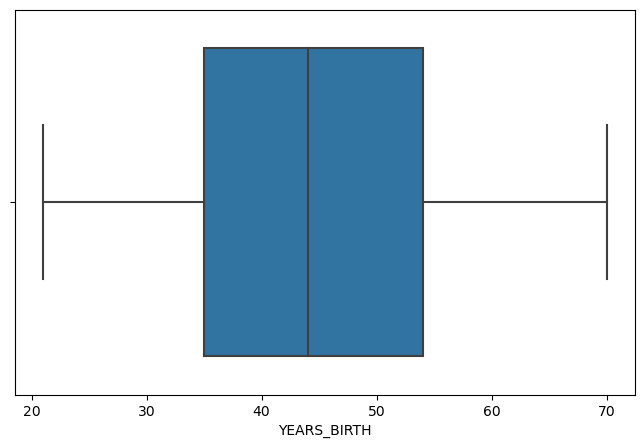

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean         14.165721
std           9.647134
min           0.000000
25%           6.000000
50%          13.000000
75%          21.000000
max          68.000000
Name: YEARS_EMPLOYED, dtype: float64


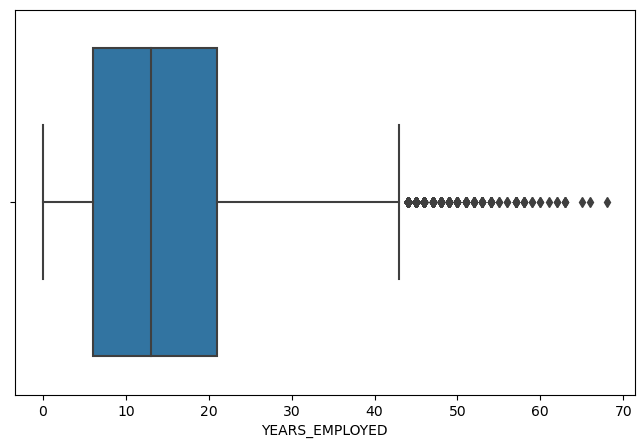

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          8.710732
std           4.134511
min           0.000000
25%           5.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


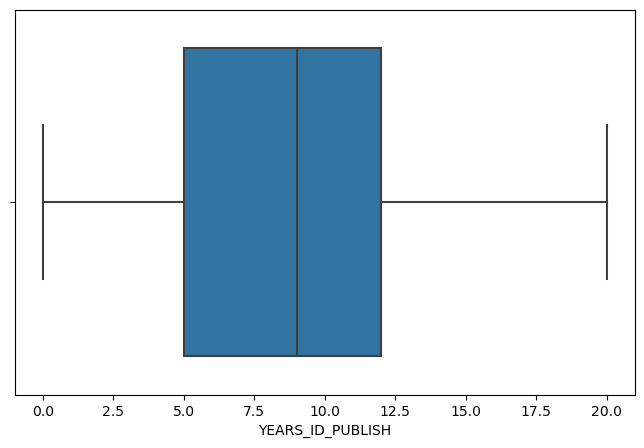

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          3.100390
std           2.337104
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max          12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


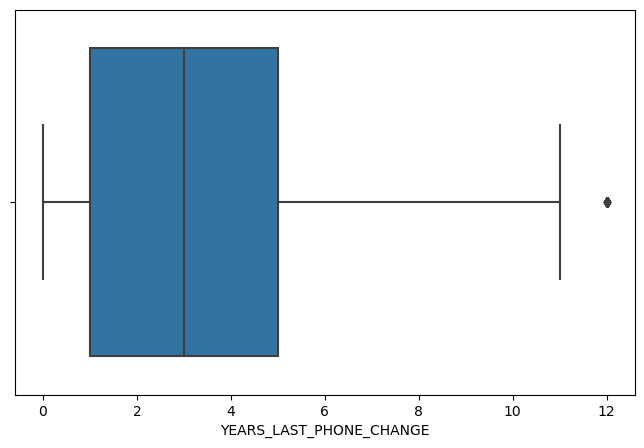

-----------------------------------------------------------------------------------------------------------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


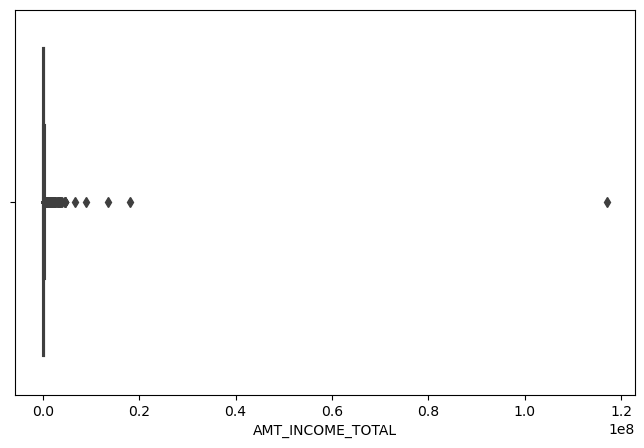

-----------------------------------------------------------------------------------------------------------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


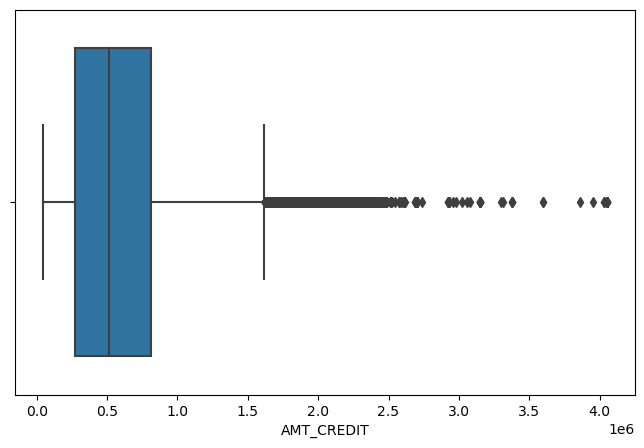

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


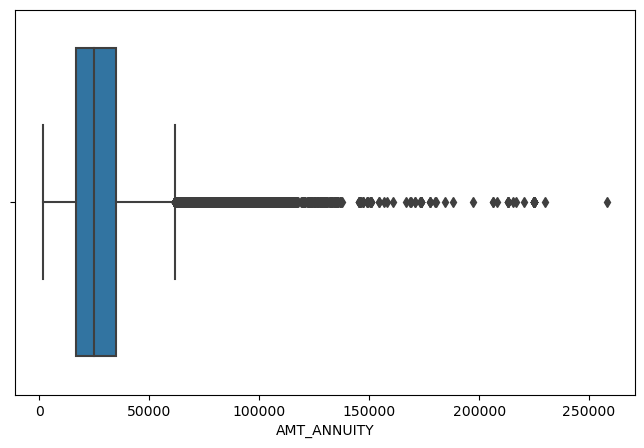

-----------------------------------------------------------------------------------------------------------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


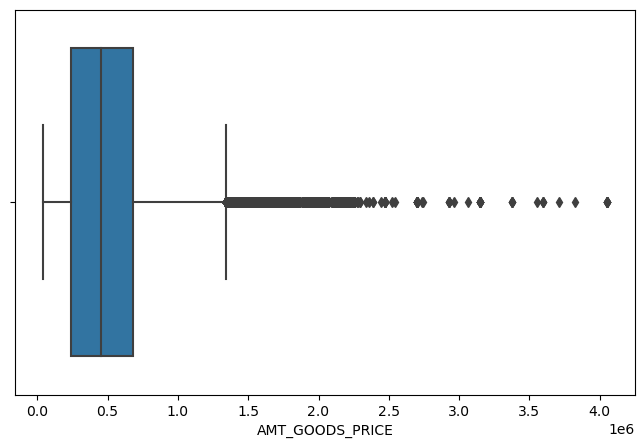

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


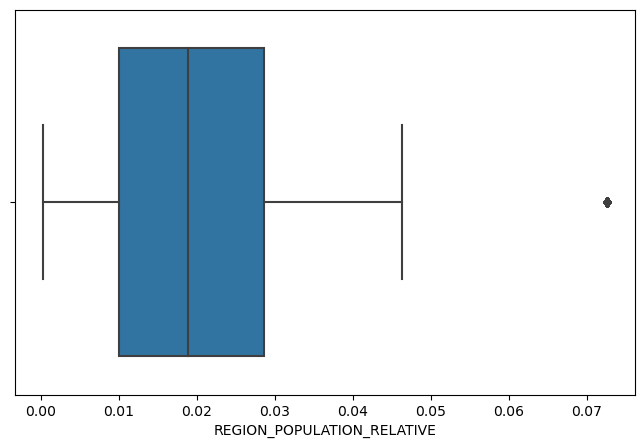

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


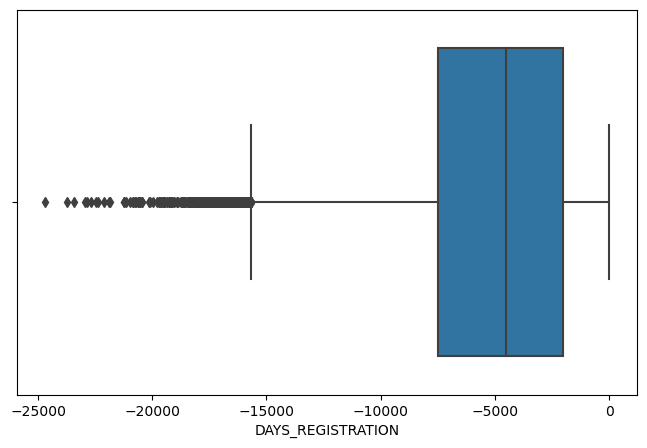

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


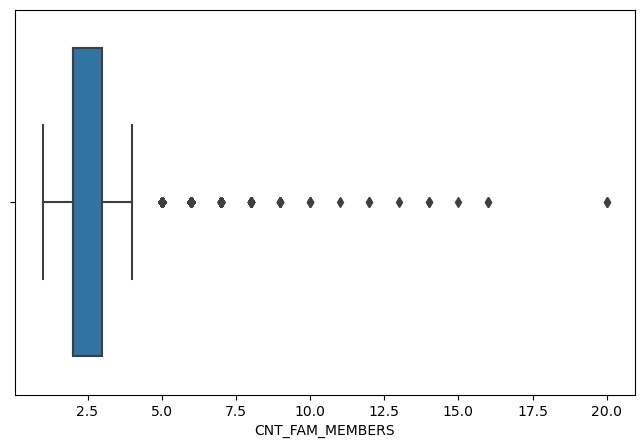

-----------------------------------------------------------------------------------------------------------------
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


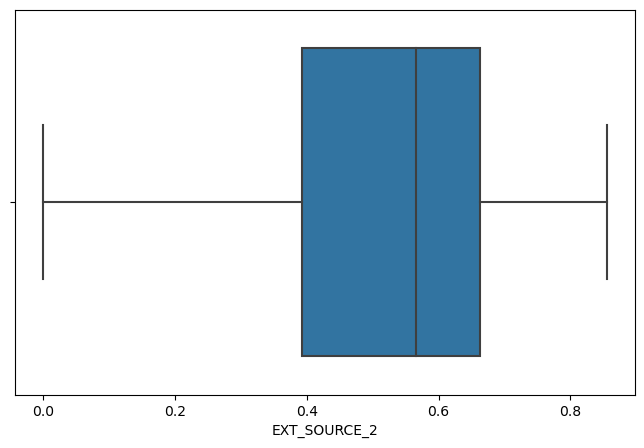

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


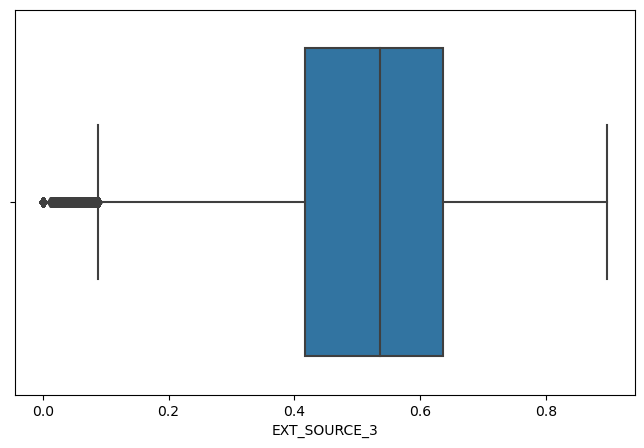

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


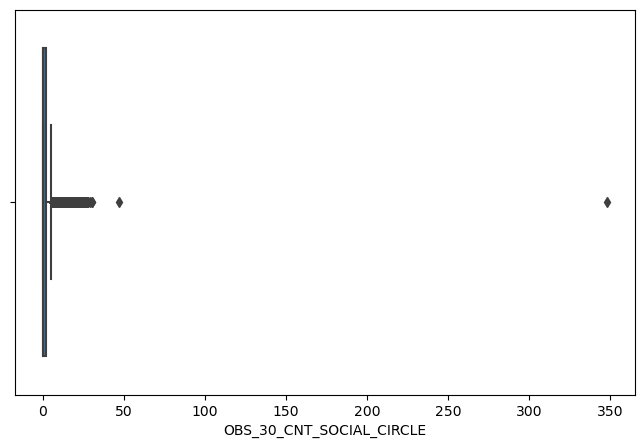

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


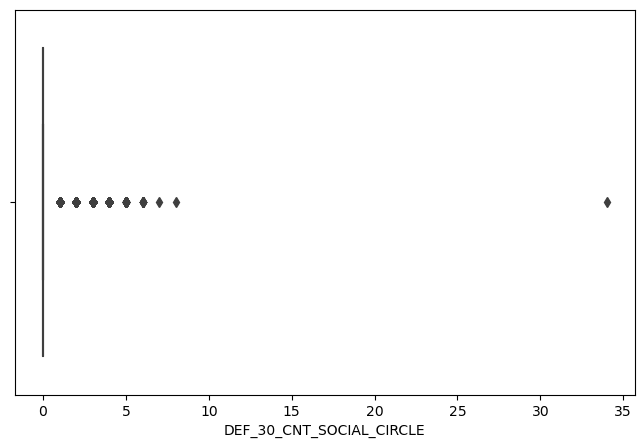

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


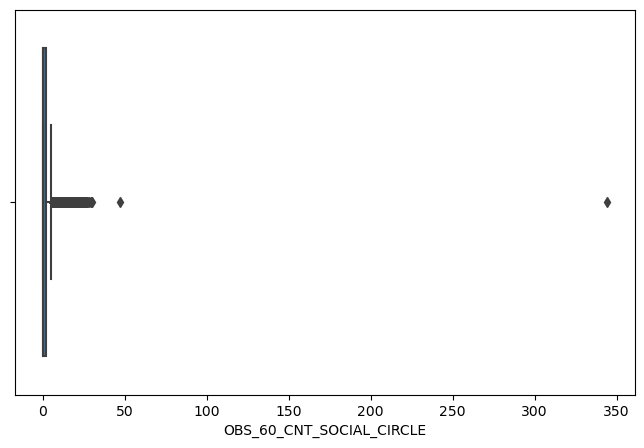

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


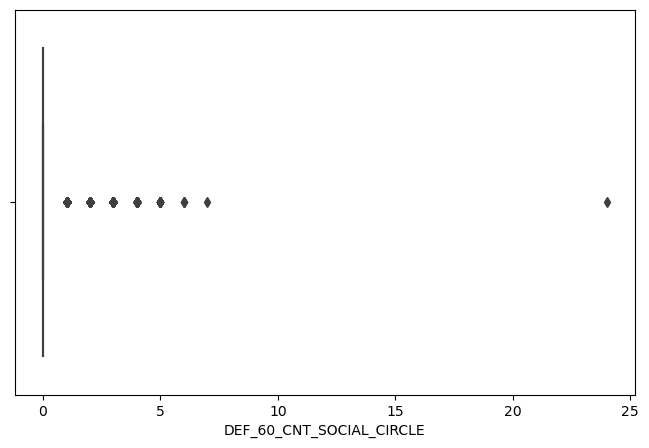

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean       -962.858119
std         826.807226
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


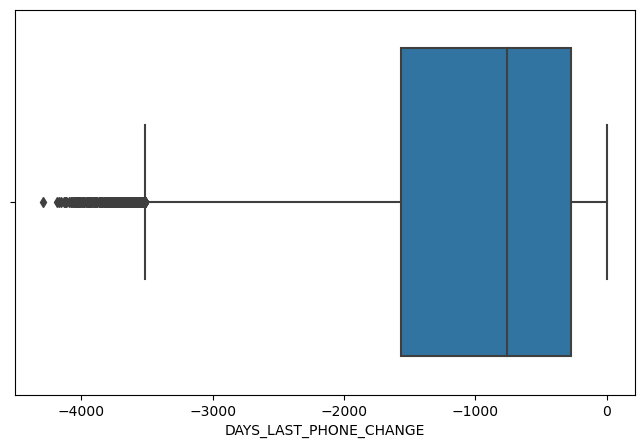

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


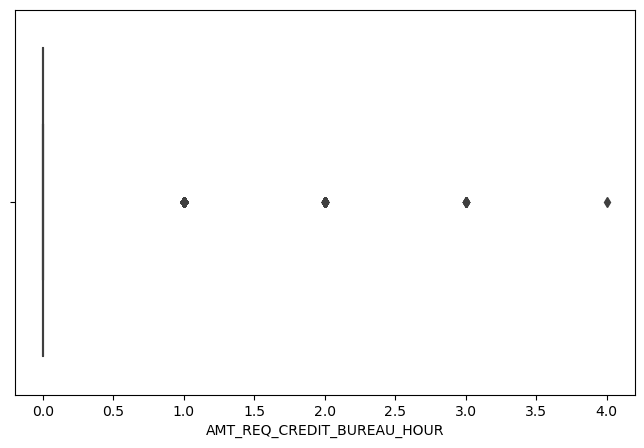

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


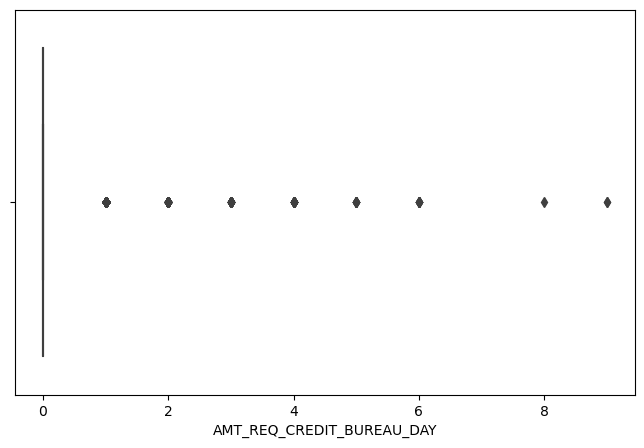

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


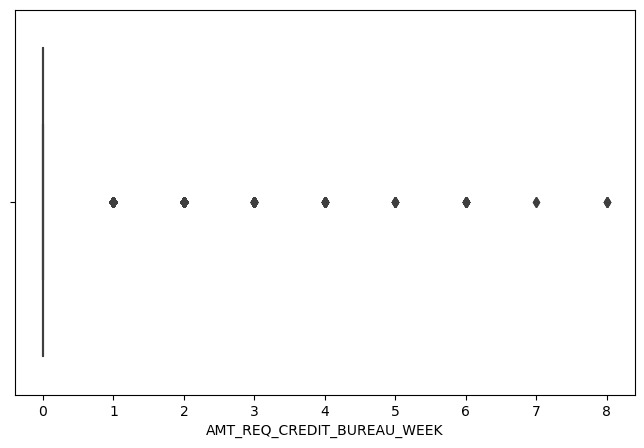

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


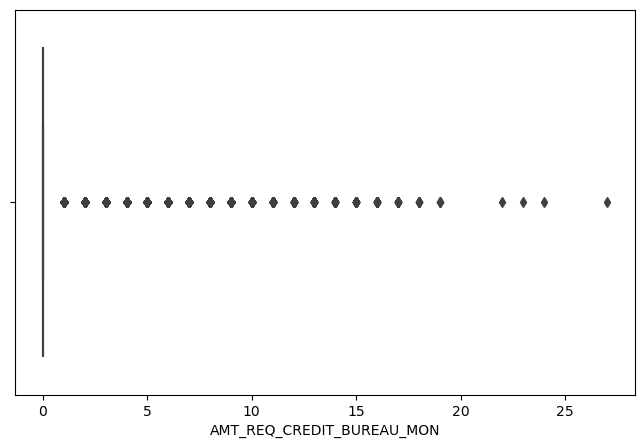

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


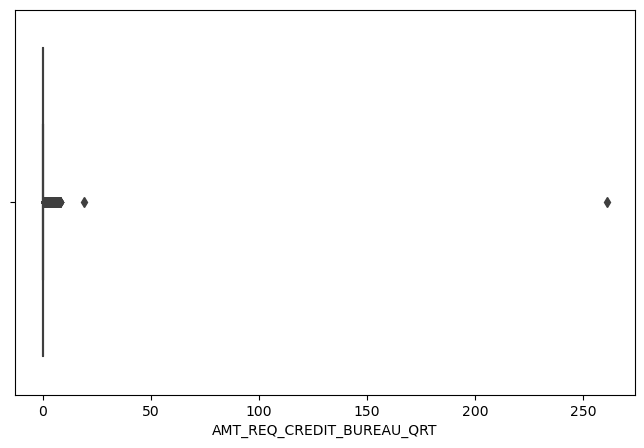

-----------------------------------------------------------------------------------------------------------------
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


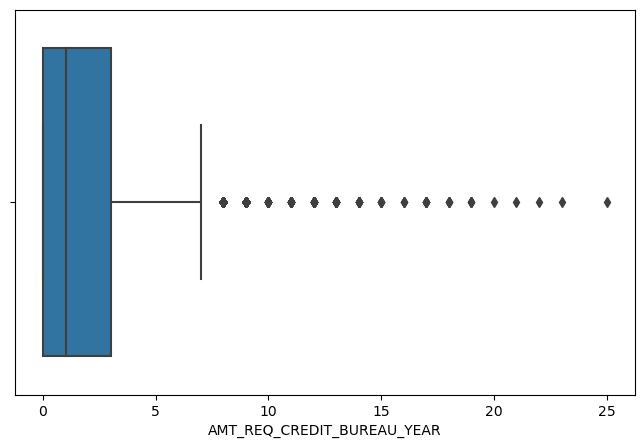

-----------------------------------------------------------------------------------------------------------------


In [43]:
for col in num_col_withoutflag:
    print(app_df[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=app_df,x=col)
    plt.show()
    print("-----------------------------------------------------------------------------------------------------------------")

#### from the given data we can see that 
- AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE have a huge difference between the 99th percentile and max percentile 

## Univariate analysis for categories

plot on NAME_CONTRACT_TYPE for target 0 and target 1


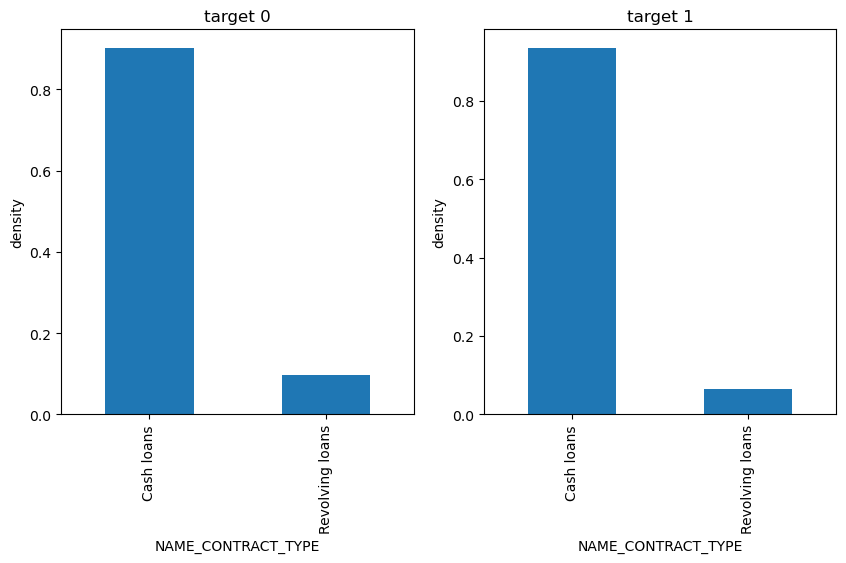

plot on CODE_GENDER for target 0 and target 1


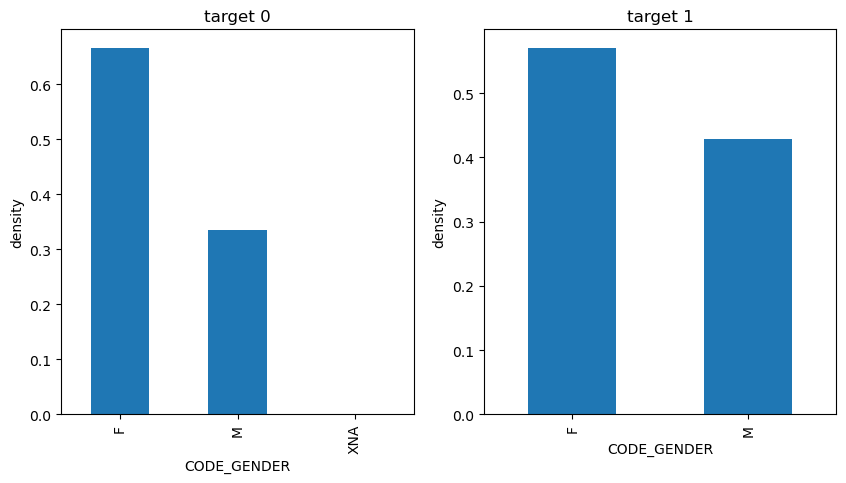

plot on FLAG_OWN_CAR for target 0 and target 1


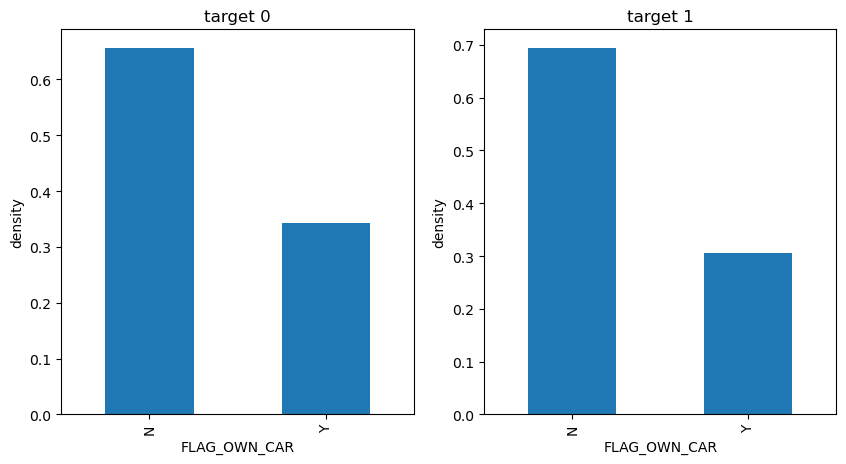

plot on FLAG_OWN_REALTY for target 0 and target 1


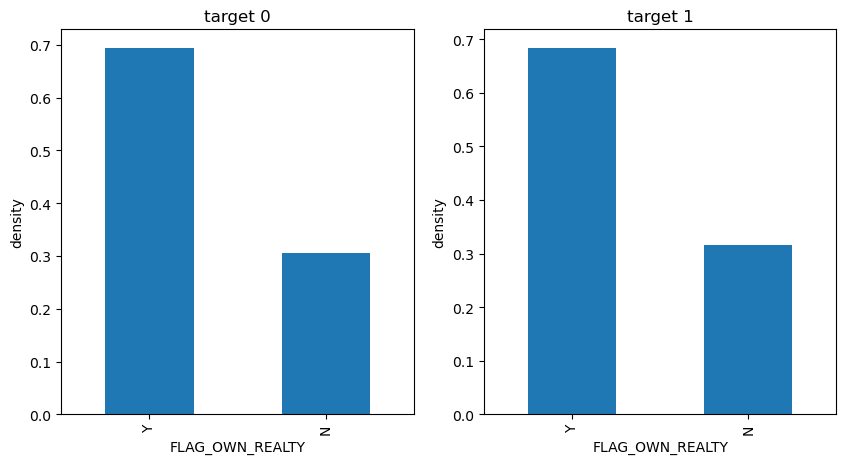

plot on NAME_TYPE_SUITE for target 0 and target 1


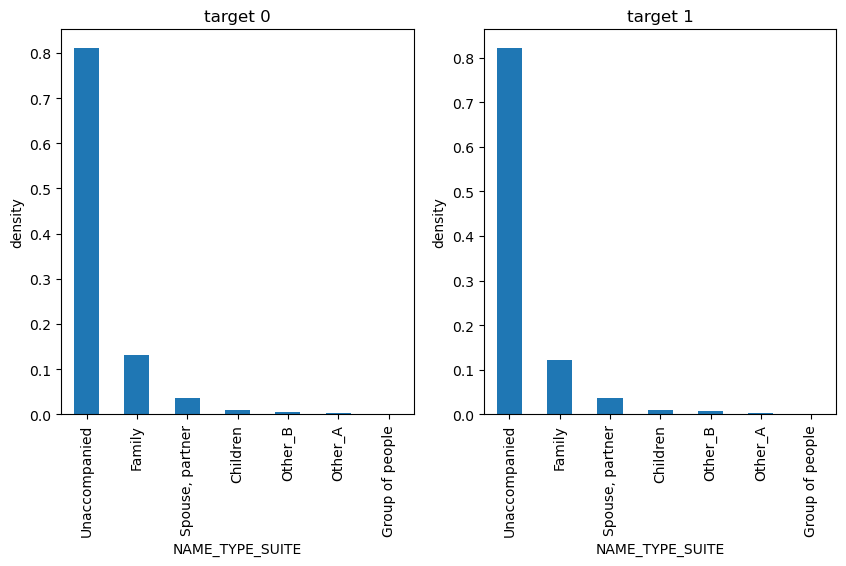

plot on NAME_INCOME_TYPE for target 0 and target 1


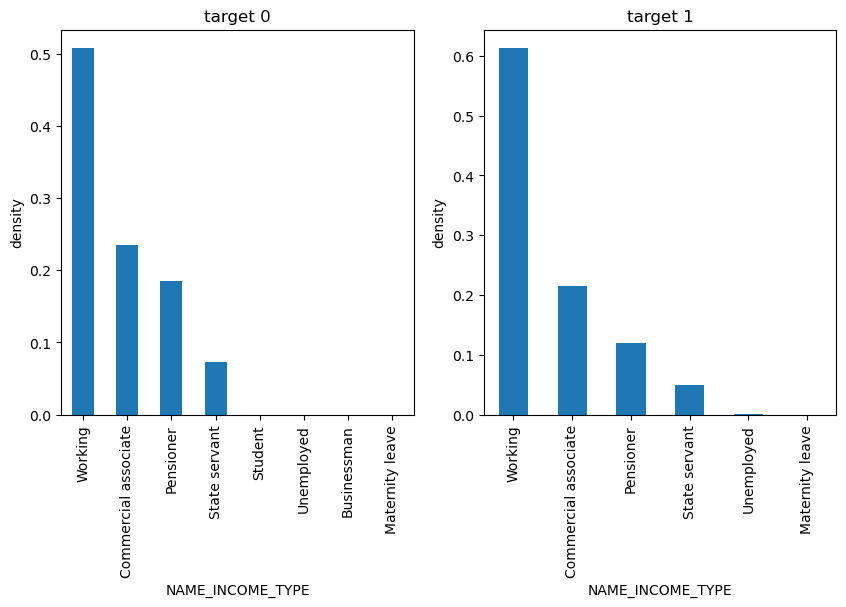

plot on NAME_EDUCATION_TYPE for target 0 and target 1


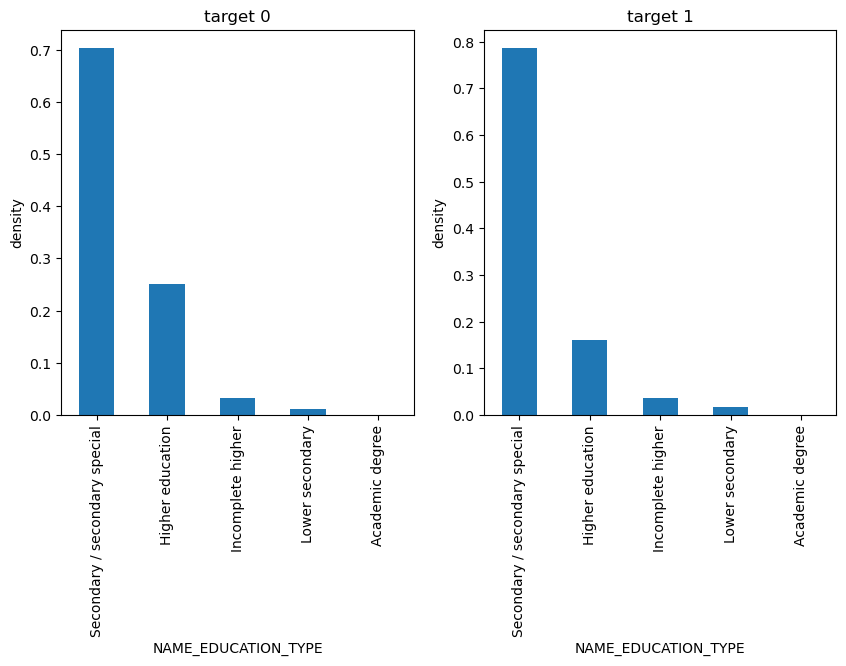

plot on NAME_FAMILY_STATUS for target 0 and target 1


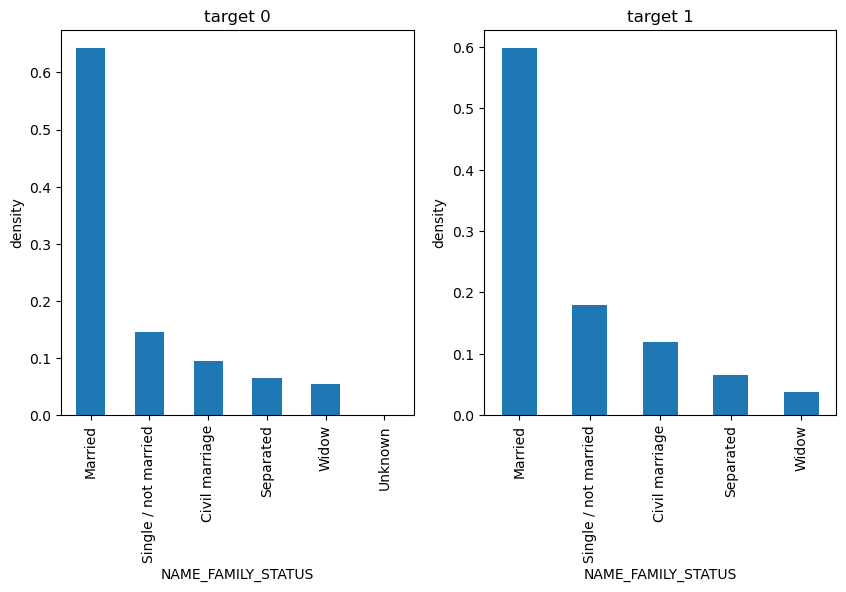

plot on NAME_HOUSING_TYPE for target 0 and target 1


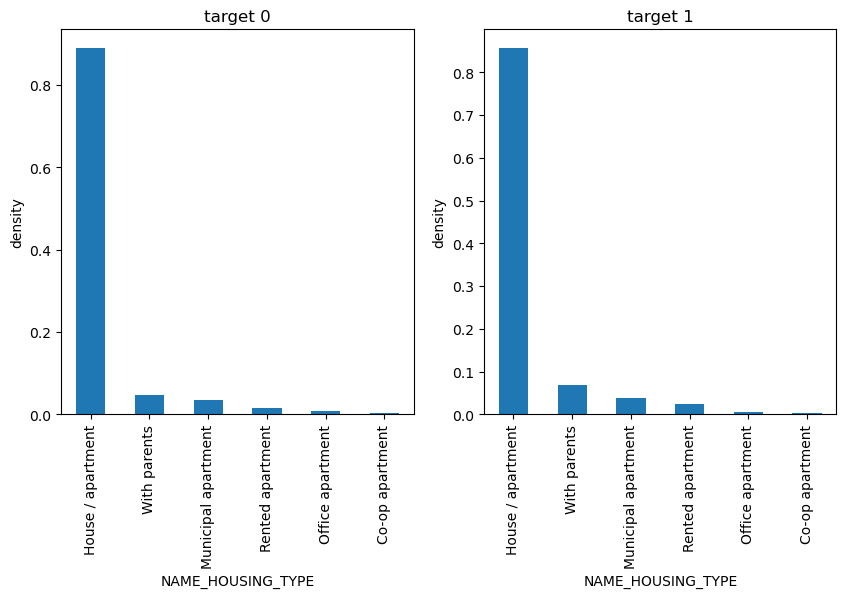

plot on OCCUPATION_TYPE for target 0 and target 1


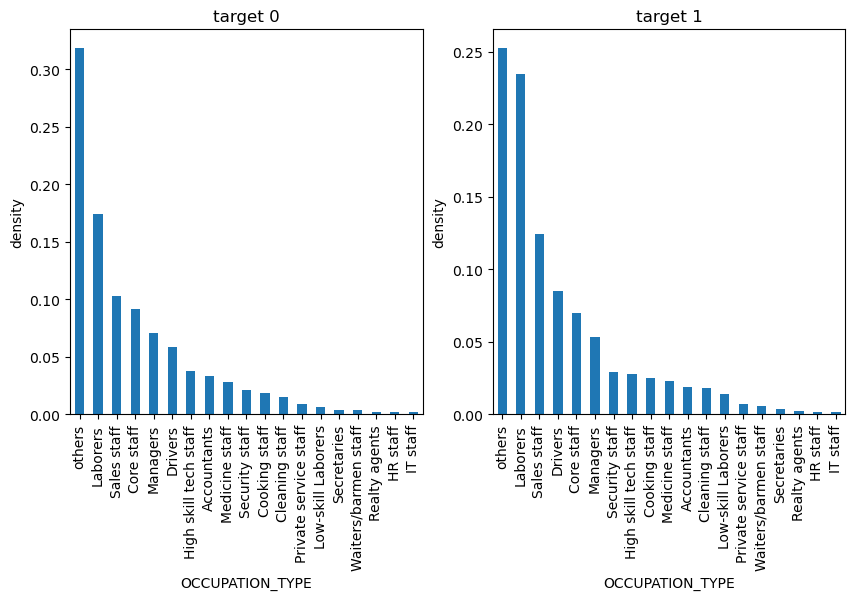

plot on WEEKDAY_APPR_PROCESS_START for target 0 and target 1


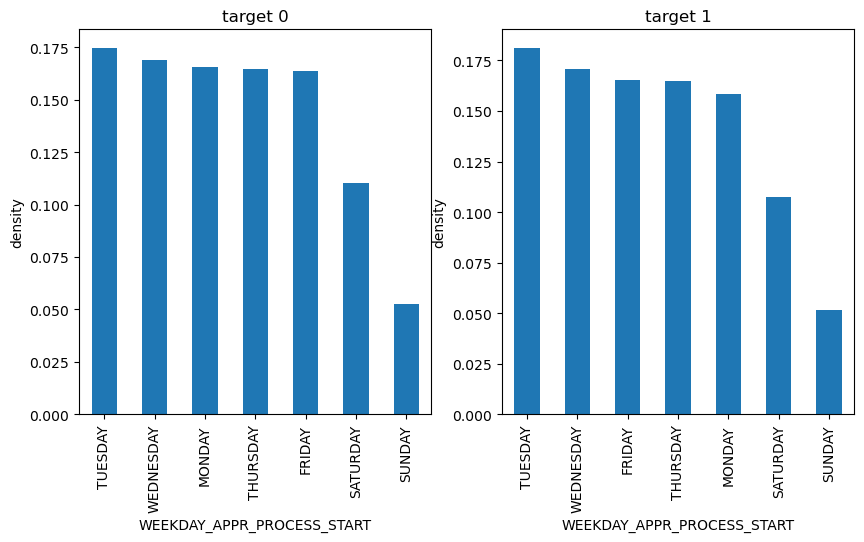

plot on ORGANIZATION_TYPE for target 0 and target 1


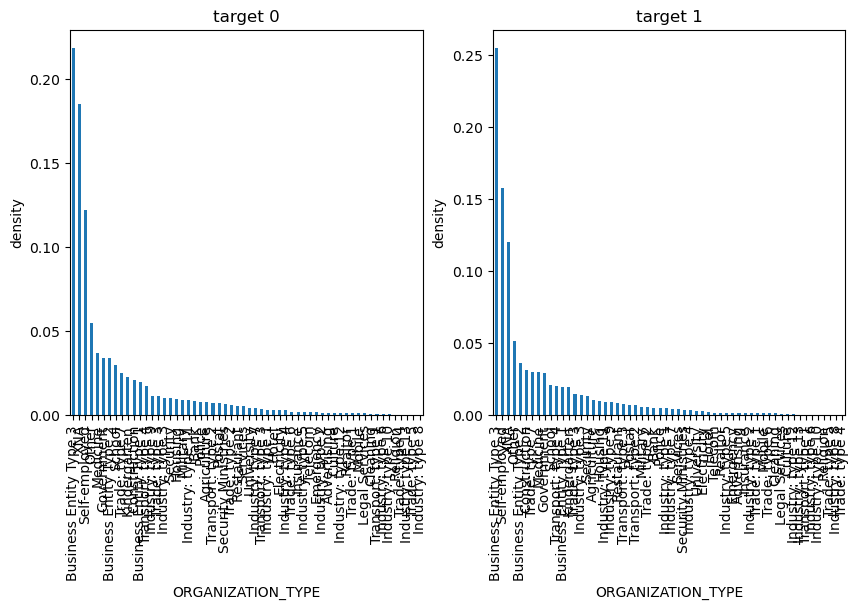

In [44]:
for col in cat_cols: 
    print(f"plot on {col} for target 0 and target 1")
    plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("target 0")
    plt.xlabel(col)
    plt.ylabel("density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("target 1")
    plt.xlabel(col)
    plt.ylabel("density")
    plt.show()

- conclusion: there are verymuch simmilar kinds of graphs between defaulters and non defaulters

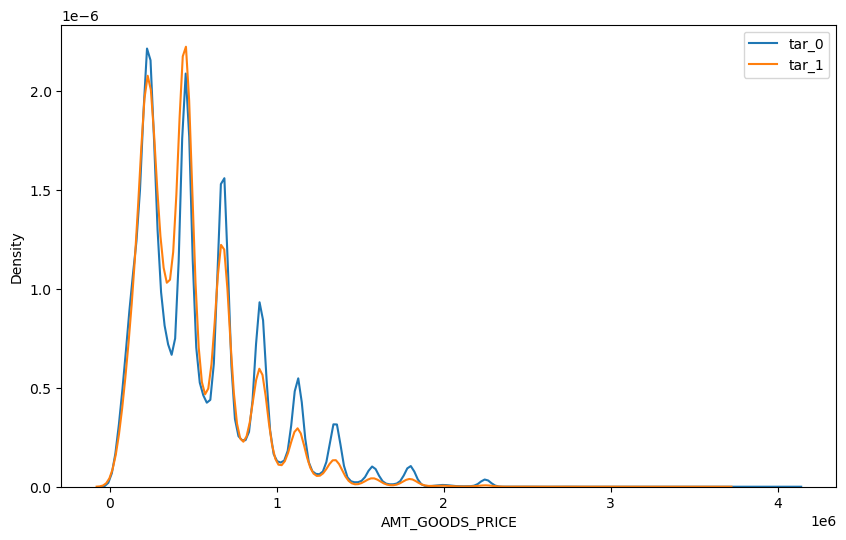

In [45]:
plt.figure(figsize=(10, 6))
sns.distplot(tar_0["AMT_GOODS_PRICE"], label='tar_0', hist=False)
sns.distplot(tar_1["AMT_GOODS_PRICE"], label='tar_1', hist=False)
plt.legend()
plt.show()

- conclusion: the price of the goods for which laons is given has same variation for target 0 and 1

# bivariate and multivariate analysis

## bivariate analysis b/n WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START

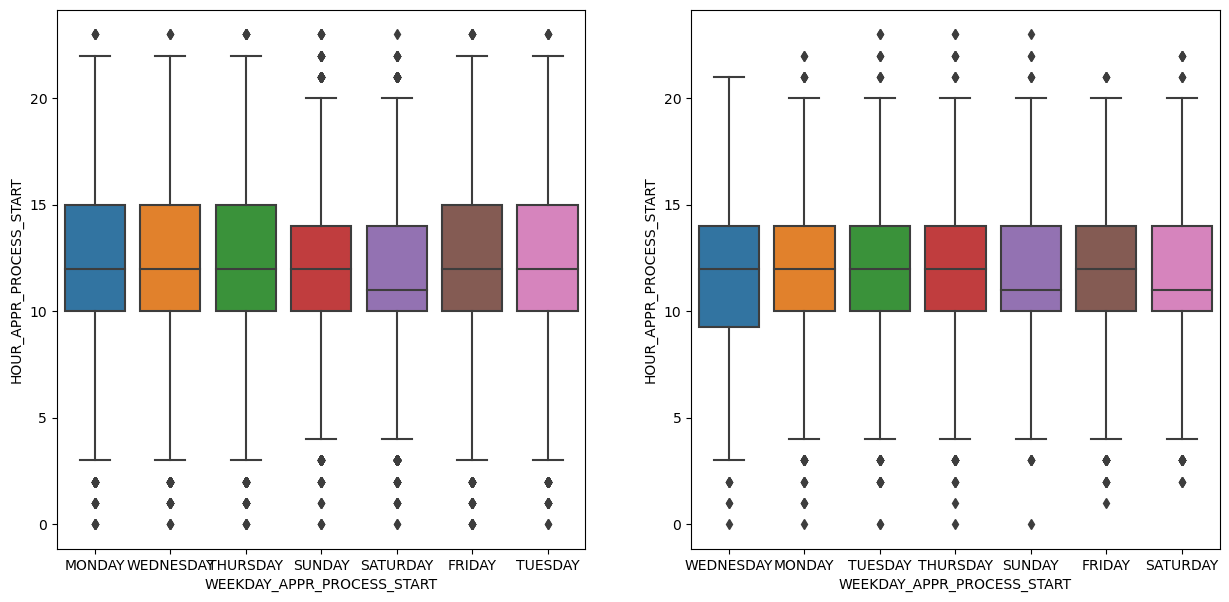

In [46]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y='HOUR_APPR_PROCESS_START',data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y='HOUR_APPR_PROCESS_START',data=tar_1)
plt.show()

- Conclusion >>
1. The Bank operates between 10am to 3pm except for Saturday and Sunday, its between 10am to 2pm.
2. We can observe that around 11:30am to 12pm around 50% of Customers visit the branch for loan application on all the days except for Saturday where the time is between 10am to 11am for both Target 0 and 1
3. The loan defaulters have applied for the loan between 9:30am-10am and 2pm where as the applicants who repay the loan on time have applied for the loan between 10am to 3pm

## bivariate analysis b/n AGE_CATEGORY v/s AMT_CREDIT

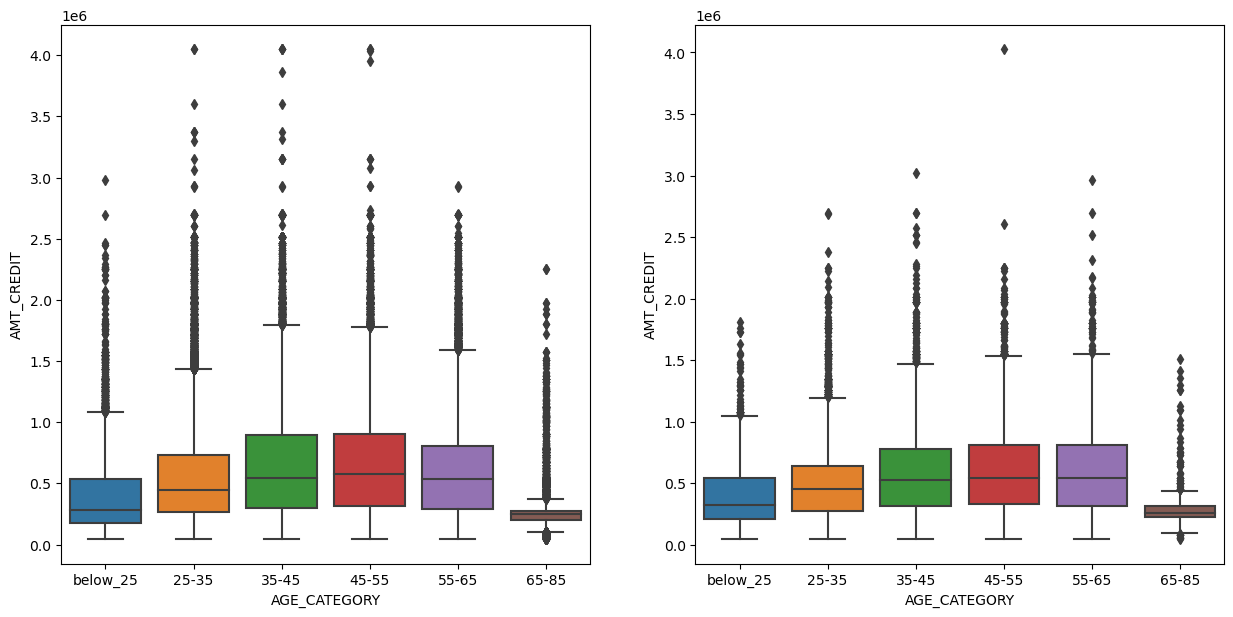

In [47]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(x='AGE_CATEGORY',y='AMT_CREDIT',data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_CATEGORY',y='AMT_CREDIT',data=tar_1)
plt.show()

- Conclusion >>
1. The applicants between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to repay the loan properly
2. The applicants with less than 100000 Credit amount are with age group greater than 65 may be considered as loan defaulters
3. Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age

## pair plot of amount for tar_0

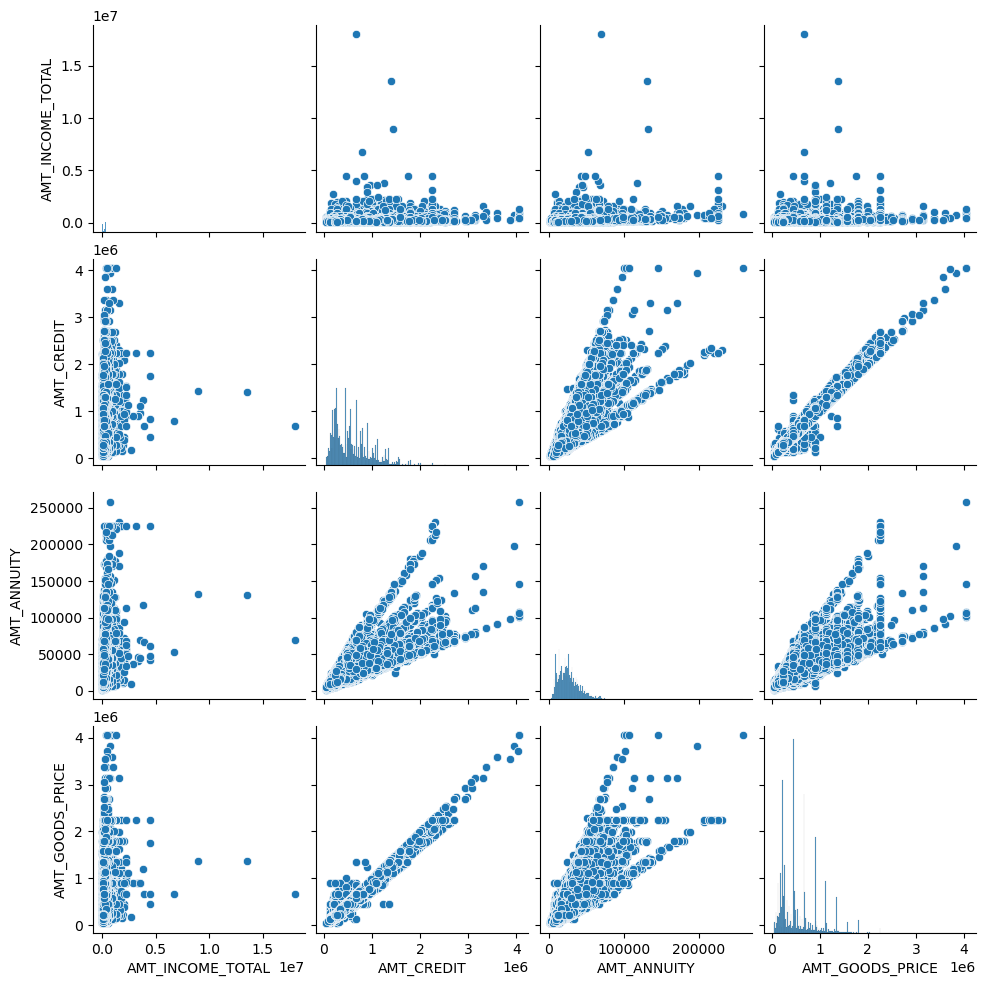

In [48]:
sns.pairplot(tar_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()

-  Conclusion >> For Applicants who are able to replay the loan on time
1. AMT CREDIT Increases or varies linearly with AMT GOODS PRICE and AMT_CREDIT Increases with AMT_ANNUITY 2. AMT ANNUITY Increases with Increases in AMT GOODS PRICE and AMT_Credit
3. AMT GOODS PRICE Increases with Increases in AMT_Credit and AMT ANNUITY
4. AMT INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT,AMT_ANNUITY AMT_GOODS_PRICE

## pair plot of amount for tar_1

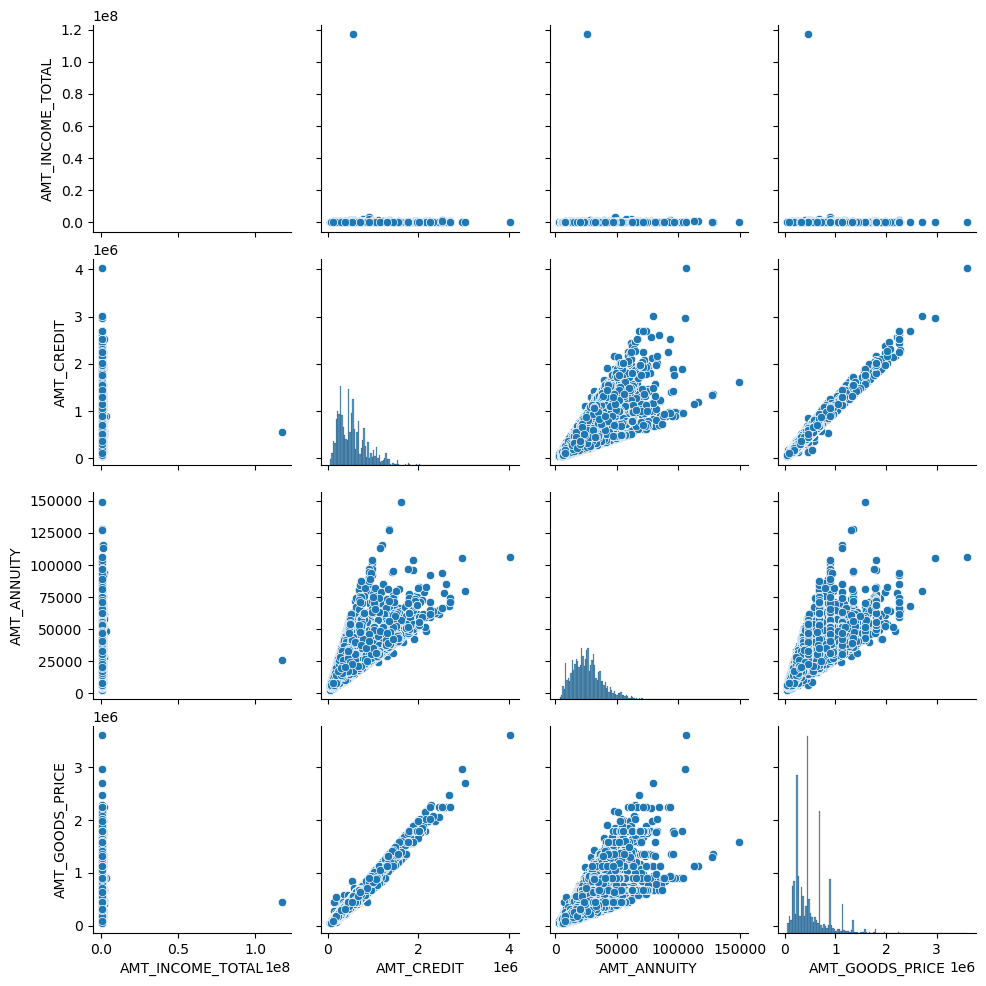

In [49]:
sns.pairplot(tar_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()

-  Conclusion >> For Applicants who are unable to replay the loan on time
1. AMT CREDIT Increases or varies linearly with AMT GOODS PRICE and AMT_CREDIT Increases with AMT ANNUITY
2. AMT ANNUITY Increases with Increases in AMT GOODS PRICE and AMT_Credit
3. AMT GOODS PRICE Increases with increases in AMT_Credit and AMT ANNUITY
4. AMT INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT AMT ANNUITY,AMT_GOODS_PRICE

# finding co-relationships b/n Numerical columns 

In [50]:
corr_data= app_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','YEARS_LAST_PHONE_CHANGE','YEARS_ID_PUBLISH','YEARS_EMPLOYED','YEARS_BIRTH',]]
corr_data.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_LAST_PHONE_CHANGE,YEARS_ID_PUBLISH,YEARS_EMPLOYED,YEARS_BIRTH
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159632,0.019298,-0.008661,-0.027783,-0.027248
AMT_CREDIT,0.156870,1.000000,0.770127,0.986734,0.077633,0.006852,-0.009535,0.055391
AMT_ANNUITY,0.191657,0.770127,1.000000,0.774837,0.063053,-0.011081,-0.038377,-0.009486
AMT_GOODS_PRICE,0.159632,0.986734,0.774837,1.000000,0.080445,0.009591,-0.011471,0.053465
YEARS_LAST_PHONE_CHANGE,0.019298,0.077633,0.063053,0.080445,1.000000,0.084702,0.054138,0.078335
YEARS_ID_PUBLISH,-0.008661,0.006852,-0.011081,0.009591,0.084702,1.000000,0.101405,0.271505
YEARS_EMPLOYED,-0.027783,-0.009535,-0.038377,-0.011471,0.054138,0.101405,1.000000,0.331685
YEARS_BIRTH,-0.027248,0.055391,-0.009486,0.053465,0.078335,0.271505,0.331685,1.000000


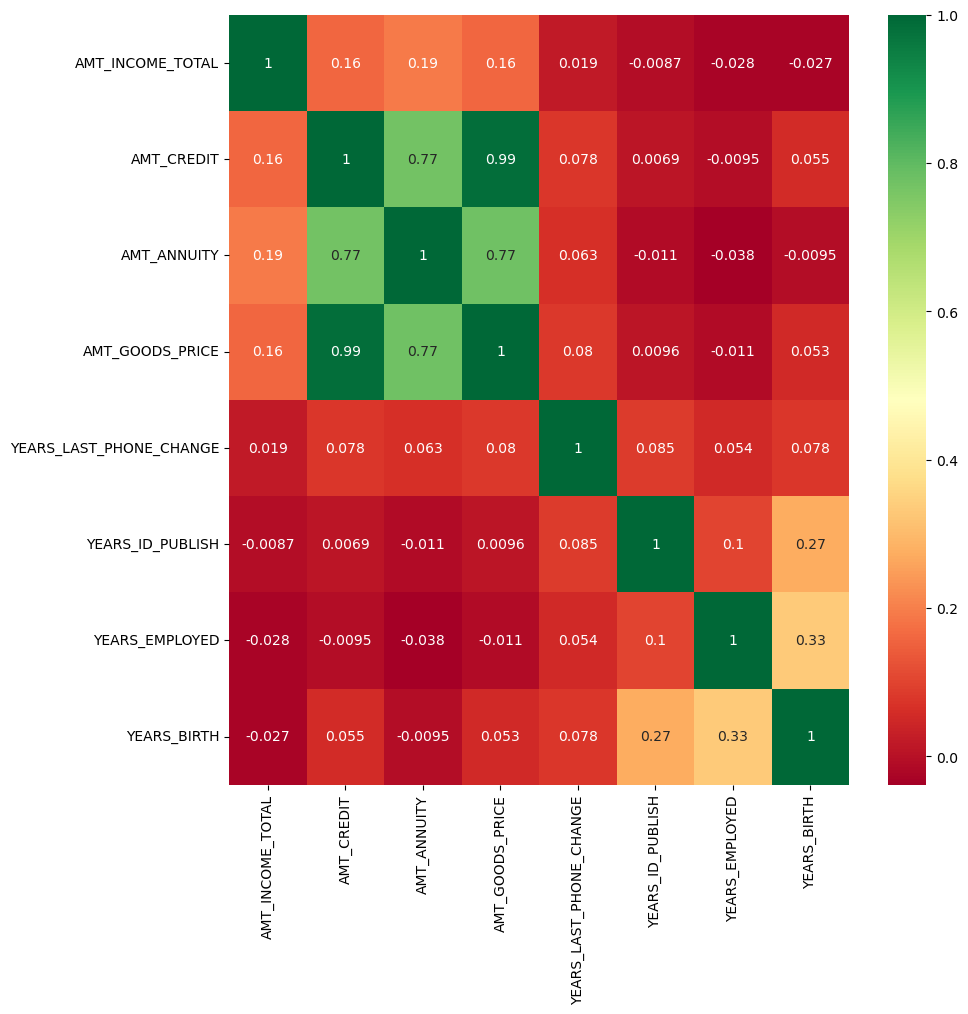

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

- Conclusion 
1. AMT_INCOME_TOTAL - It has a positive corelation index of 0.16,0.19,0.16 with AMT_CREDIT AMT ANNUITY,AMT GOODS PRICE respectively.
2. AMT CREDIT-Is has negative coreltaion index of 0.064 with YEARS EMPLOYED and positive coreltaion index of 0.99,0.77 with AMT GOODS_PRICE AMT ANNUITY respectively.
3. AMT ANNUITY - Is has negative coreltaion index of 0.1 with YEARS EMPLOYED and positive coreltaion index of 0.77 with AMT_CREDIT
4. AMT GOODS PRICE-It has a positive corelation with AMT CREDIT,AMT ANNUITY
5. YEARS BIRTH-It has a positive corelation with YEARS_EMPLOYED, AMT GOODS PRICE and negative coreltaion with AMT_ANNUITY AMT_INCOME_TOTAL
6. YEARS EMPLOYED - Is has negative coreltaion index of 0.1 with AMT ANNUITY and has a positive corelation with YEARS_REGISTRATION, YEARS ID PUBLISH
7. YEARS_ID_PUBLISH - It has a positive corelation with YEARS REGISTRATION and negative coreltaion with AMT_INCOME_TOTAL,AMT_ANNUITY 9. YEARS LAST_PHONE_CHANGE-It has negative coreltaion with YEARS EMPLOYED and positive corelation with AMT GOODS PRICE,YEARS_ID_PUBLISH

# split numeric values to tar_0 and tar_1 to find co-relations

In [52]:
corr_data_0= tar_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','YEARS_LAST_PHONE_CHANGE','YEARS_ID_PUBLISH','YEARS_EMPLOYED','YEARS_BIRTH',]]
corr_data_0.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_LAST_PHONE_CHANGE,YEARS_ID_PUBLISH,YEARS_EMPLOYED,YEARS_BIRTH
AMT_INCOME_TOTAL,1.000000,0.342799,0.418948,0.349426,0.043513,-0.022801,-0.064883,-0.062542
AMT_CREDIT,0.342799,1.000000,0.771297,0.987022,0.073696,0.001801,-0.013392,0.047350
AMT_ANNUITY,0.418948,0.771297,1.000000,0.776421,0.061599,-0.013899,-0.039307,-0.012283
AMT_GOODS_PRICE,0.349426,0.987022,0.776421,1.000000,0.075728,0.004032,-0.015823,0.044619
YEARS_LAST_PHONE_CHANGE,0.043513,0.073696,0.061599,0.075728,1.000000,0.079070,0.050605,0.071852
YEARS_ID_PUBLISH,-0.022801,0.001801,-0.013899,0.004032,0.079070,1.000000,0.099711,0.270091
YEARS_EMPLOYED,-0.064883,-0.013392,-0.039307,-0.015823,0.050605,0.099711,1.000000,0.332918
YEARS_BIRTH,-0.062542,0.047350,-0.012283,0.044619,0.071852,0.270091,0.332918,1.000000


In [53]:
corr_data_1= tar_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','YEARS_LAST_PHONE_CHANGE','YEARS_ID_PUBLISH','YEARS_EMPLOYED','YEARS_BIRTH',]]
corr_data_1.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_LAST_PHONE_CHANGE,YEARS_ID_PUBLISH,YEARS_EMPLOYED,YEARS_BIRTH
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037591,0.001499,0.003460,-0.000160,-0.003158
AMT_CREDIT,0.038131,1.000000,0.752195,0.982783,0.111253,0.051992,0.025976,0.135044
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752295,0.074932,0.016683,-0.034025,0.013984
AMT_GOODS_PRICE,0.037591,0.982783,0.752295,1.000000,0.118866,0.055865,0.025842,0.135506
YEARS_LAST_PHONE_CHANGE,0.001499,0.111253,0.074932,0.118866,1.000000,0.119652,0.069574,0.106375
YEARS_ID_PUBLISH,0.003460,0.051992,0.016683,0.055865,0.119652,1.000000,0.096897,0.252306
YEARS_EMPLOYED,-0.000160,0.025976,-0.034025,0.025842,0.069574,0.096897,1.000000,0.288941
YEARS_BIRTH,-0.003158,0.135044,0.013984,0.135506,0.106375,0.252306,0.288941,1.000000


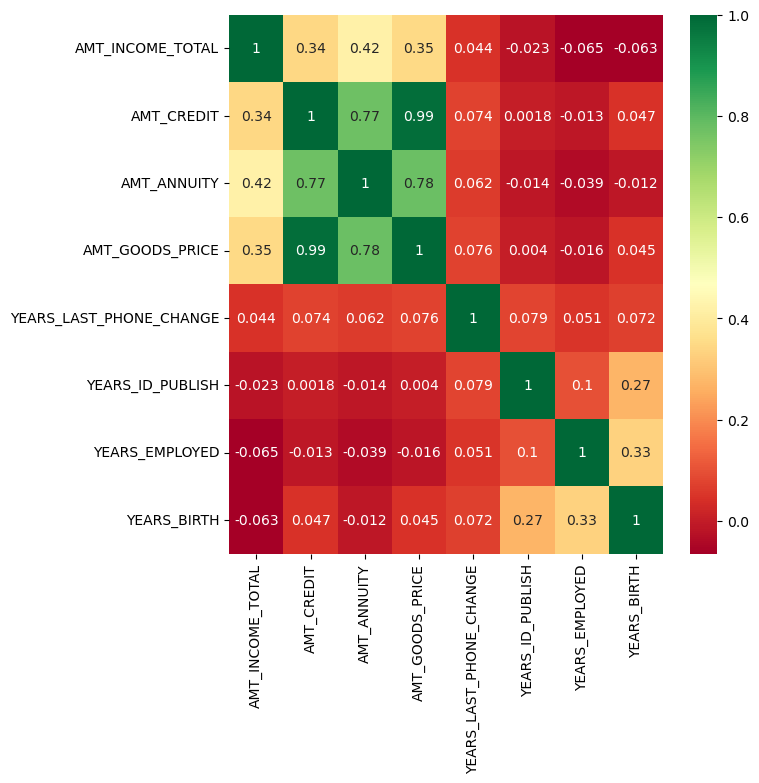

In [54]:
plt.figure(figsize=(7,7))
sns.heatmap(corr_data_0.corr(), annot=True, cmap='RdYlGn')
plt.show()


- Conclusion >>
1. AMT INCOME_TOTAL - It has a positive corelation index of 0.34.0.42.0.35 with AMT CREDIT AMT ANNUITY AMT GOODS PRICE respectively and Negative with most of the other Year columns
2. AMT CREDIT - Is has a strong positive coreltaion index of 0.99,0.77 with AMT GOODS PRICE, AMT ANNUITY respectively.
3. AMT ANNUITY - Is has positive coreltaion index of 0.77,0.78 with AMT CREDIT,AMT GOODS PRICE respectively and Negative with most of the other Year columns
4. AMT GOODS PRICE - It has a strong positive corelation index 0.78,0.99 with AMT ANNUITY, AMT_CREDIT

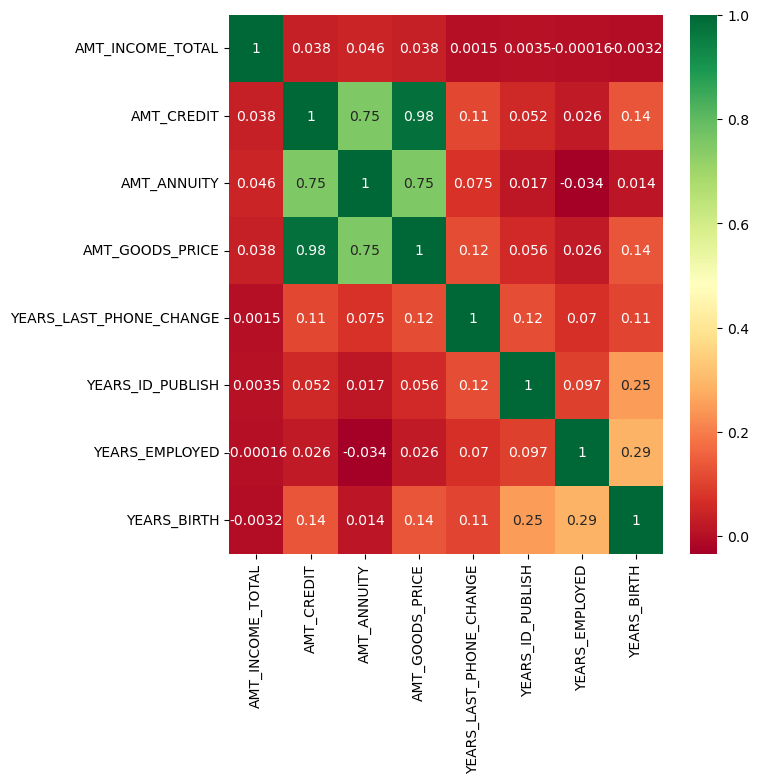

In [55]:
plt.figure(figsize=(7,7))
sns.heatmap(corr_data_1.corr(), annot=True, cmap='RdYlGn')
plt.show()

- Conclusion >>
1. AMT INCOME_TOTAL-It is less correlated with AMT_CREDITAMT ANNUITY,AMT GOODS PRICE respectively
2. AMT CREDIT - Is has a strong positive coreltaion index of 0.98.0.75 with AMT GOODS PRICE. AMT_ANNUITY respectively and also positive corelation with other Year Columns
3. AMT ANNUITY - Is has positive coreltaion index of 0.75 with AMT_CREDITAMT GOODS PRICE and Negative with YEAR EMPLOYED, YEAR_REGISTRATION
4. AMT GOODS PRICE - It has a strong positive corelation index 0.75,0.98 with AMT ANNUITY, AMT_CREDIT and weak positive corelation with other Year columns

# read previous application CSV

In [56]:
# Reading the dataset of previous application

df1=pd.read_csv("previous_application.csv")



In [57]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)


15

In [58]:
# Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(1670214, 22)

In [59]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

In [60]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=app_df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [61]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



In [62]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

**Performing univariate analysis**

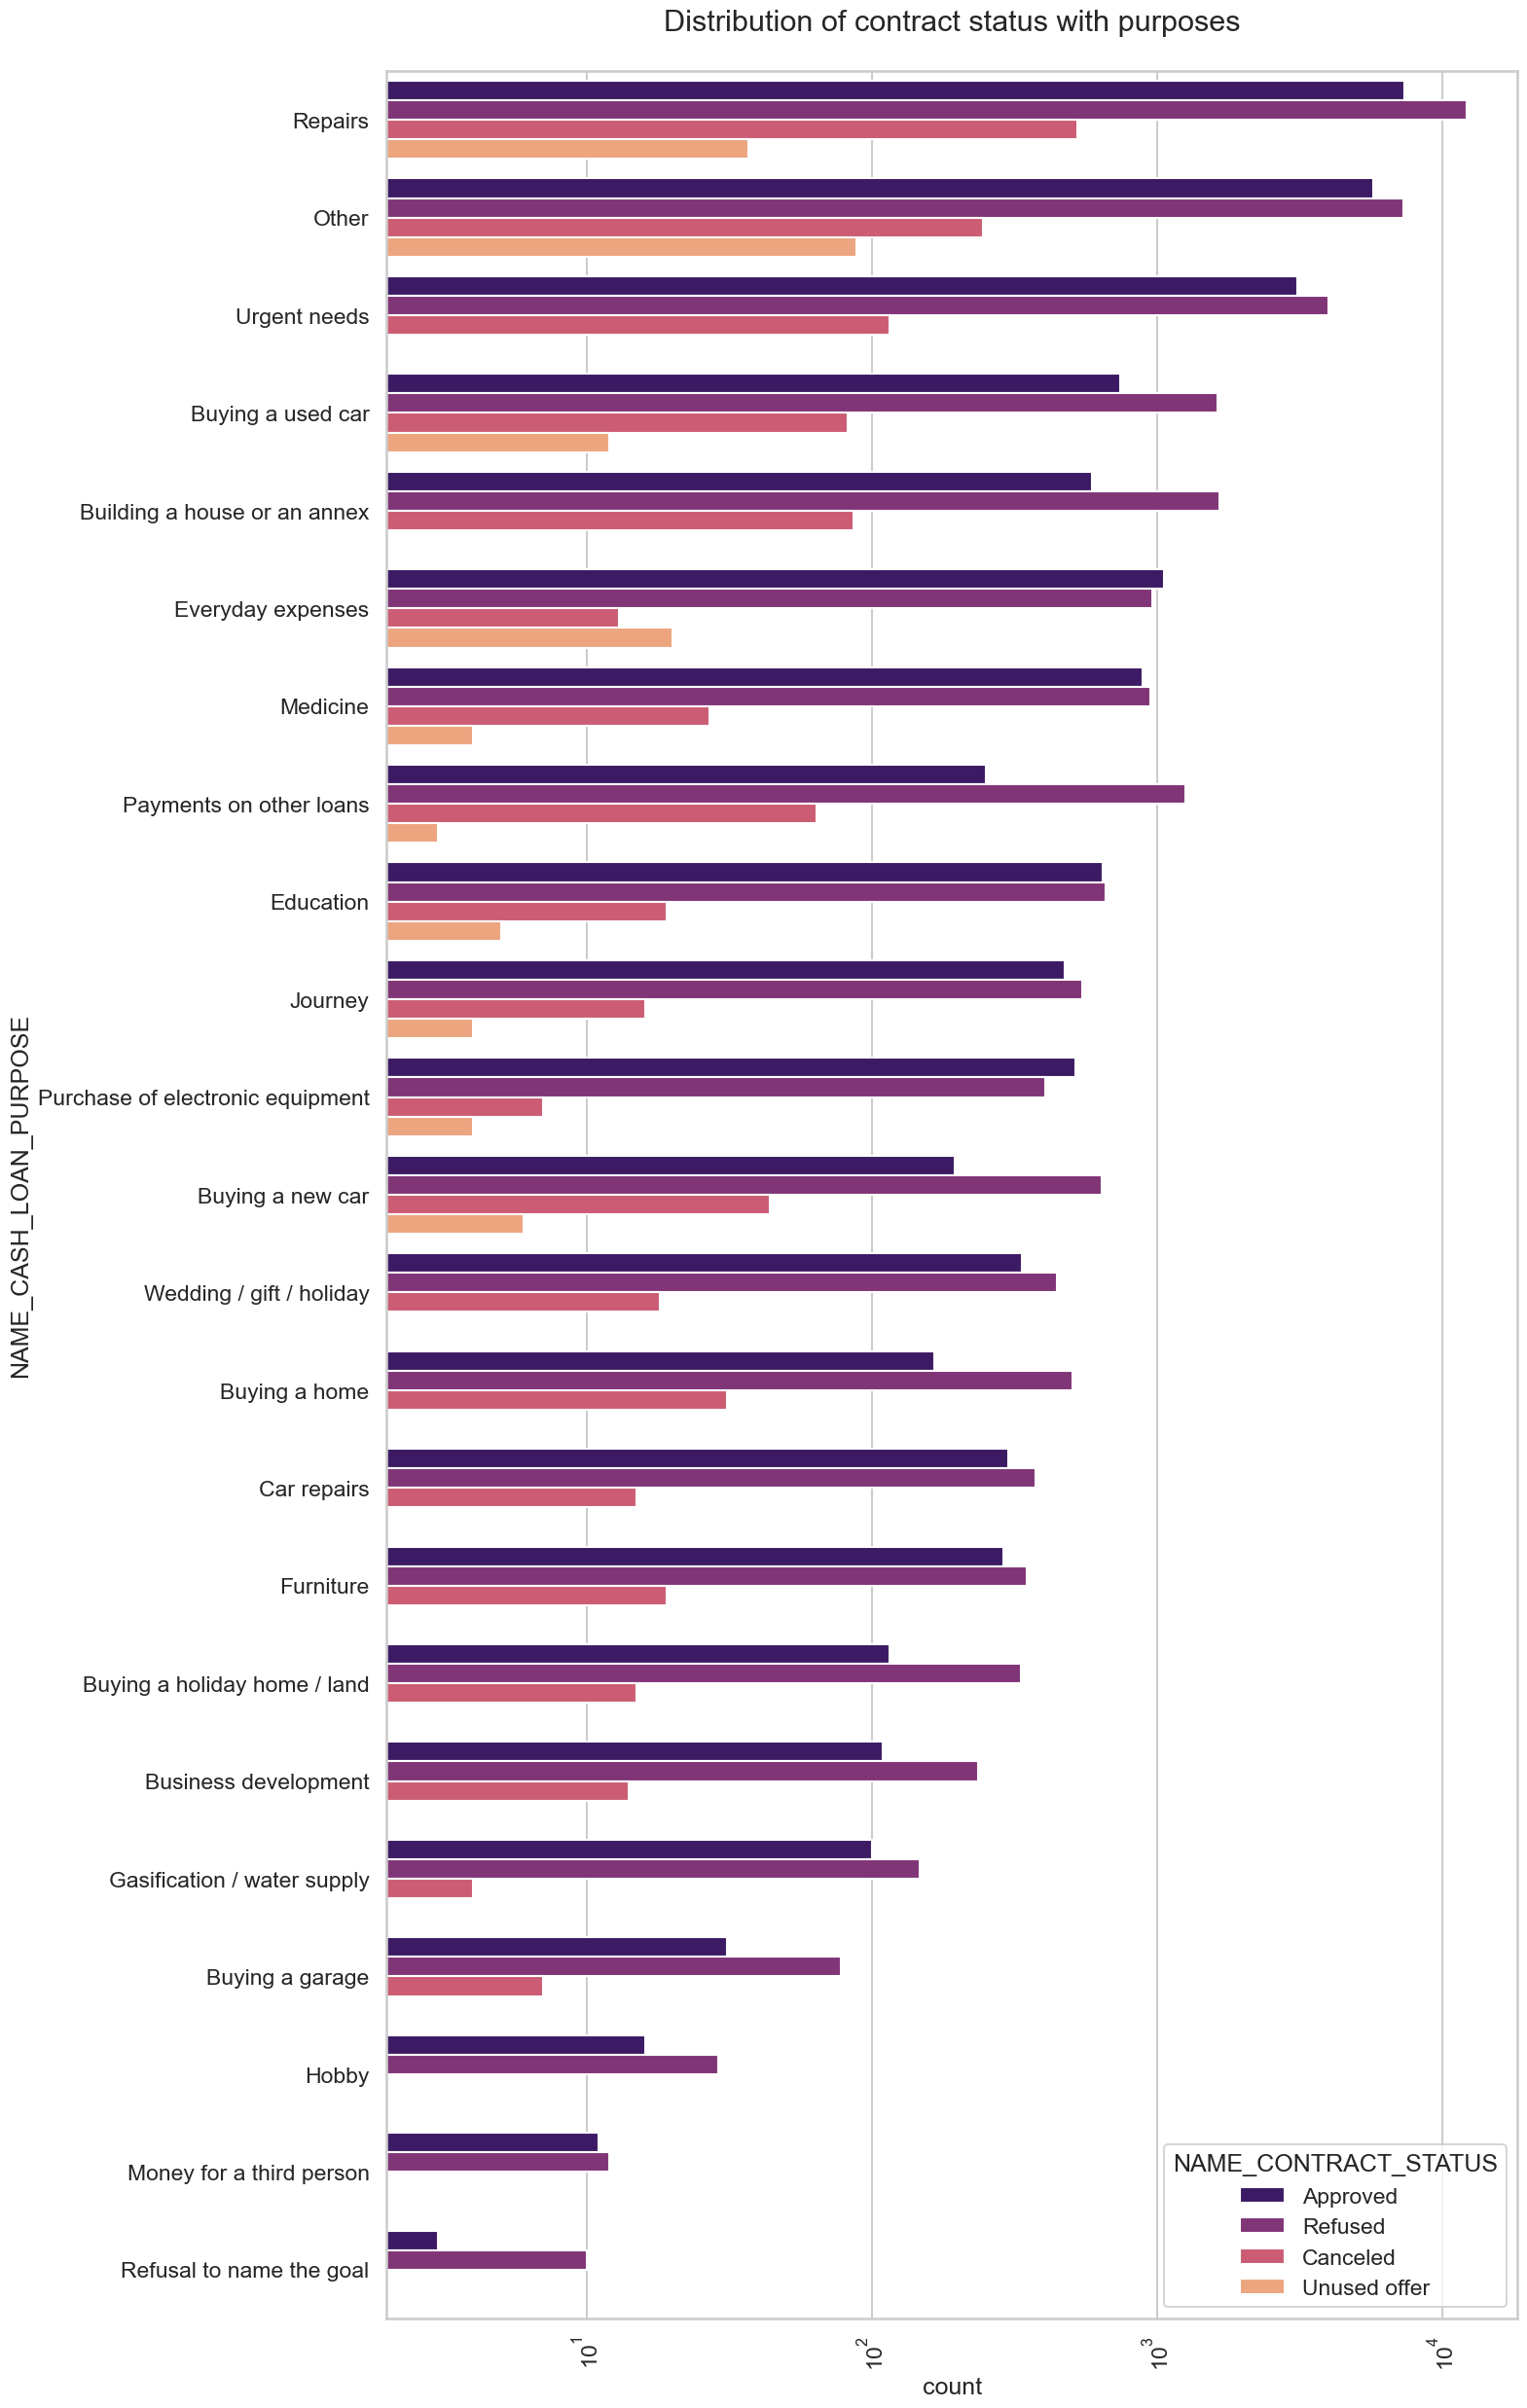

In [63]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

Points to be concluded from above plot:

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Payign other loans and buying a new car is having significant higher rejection than approves.

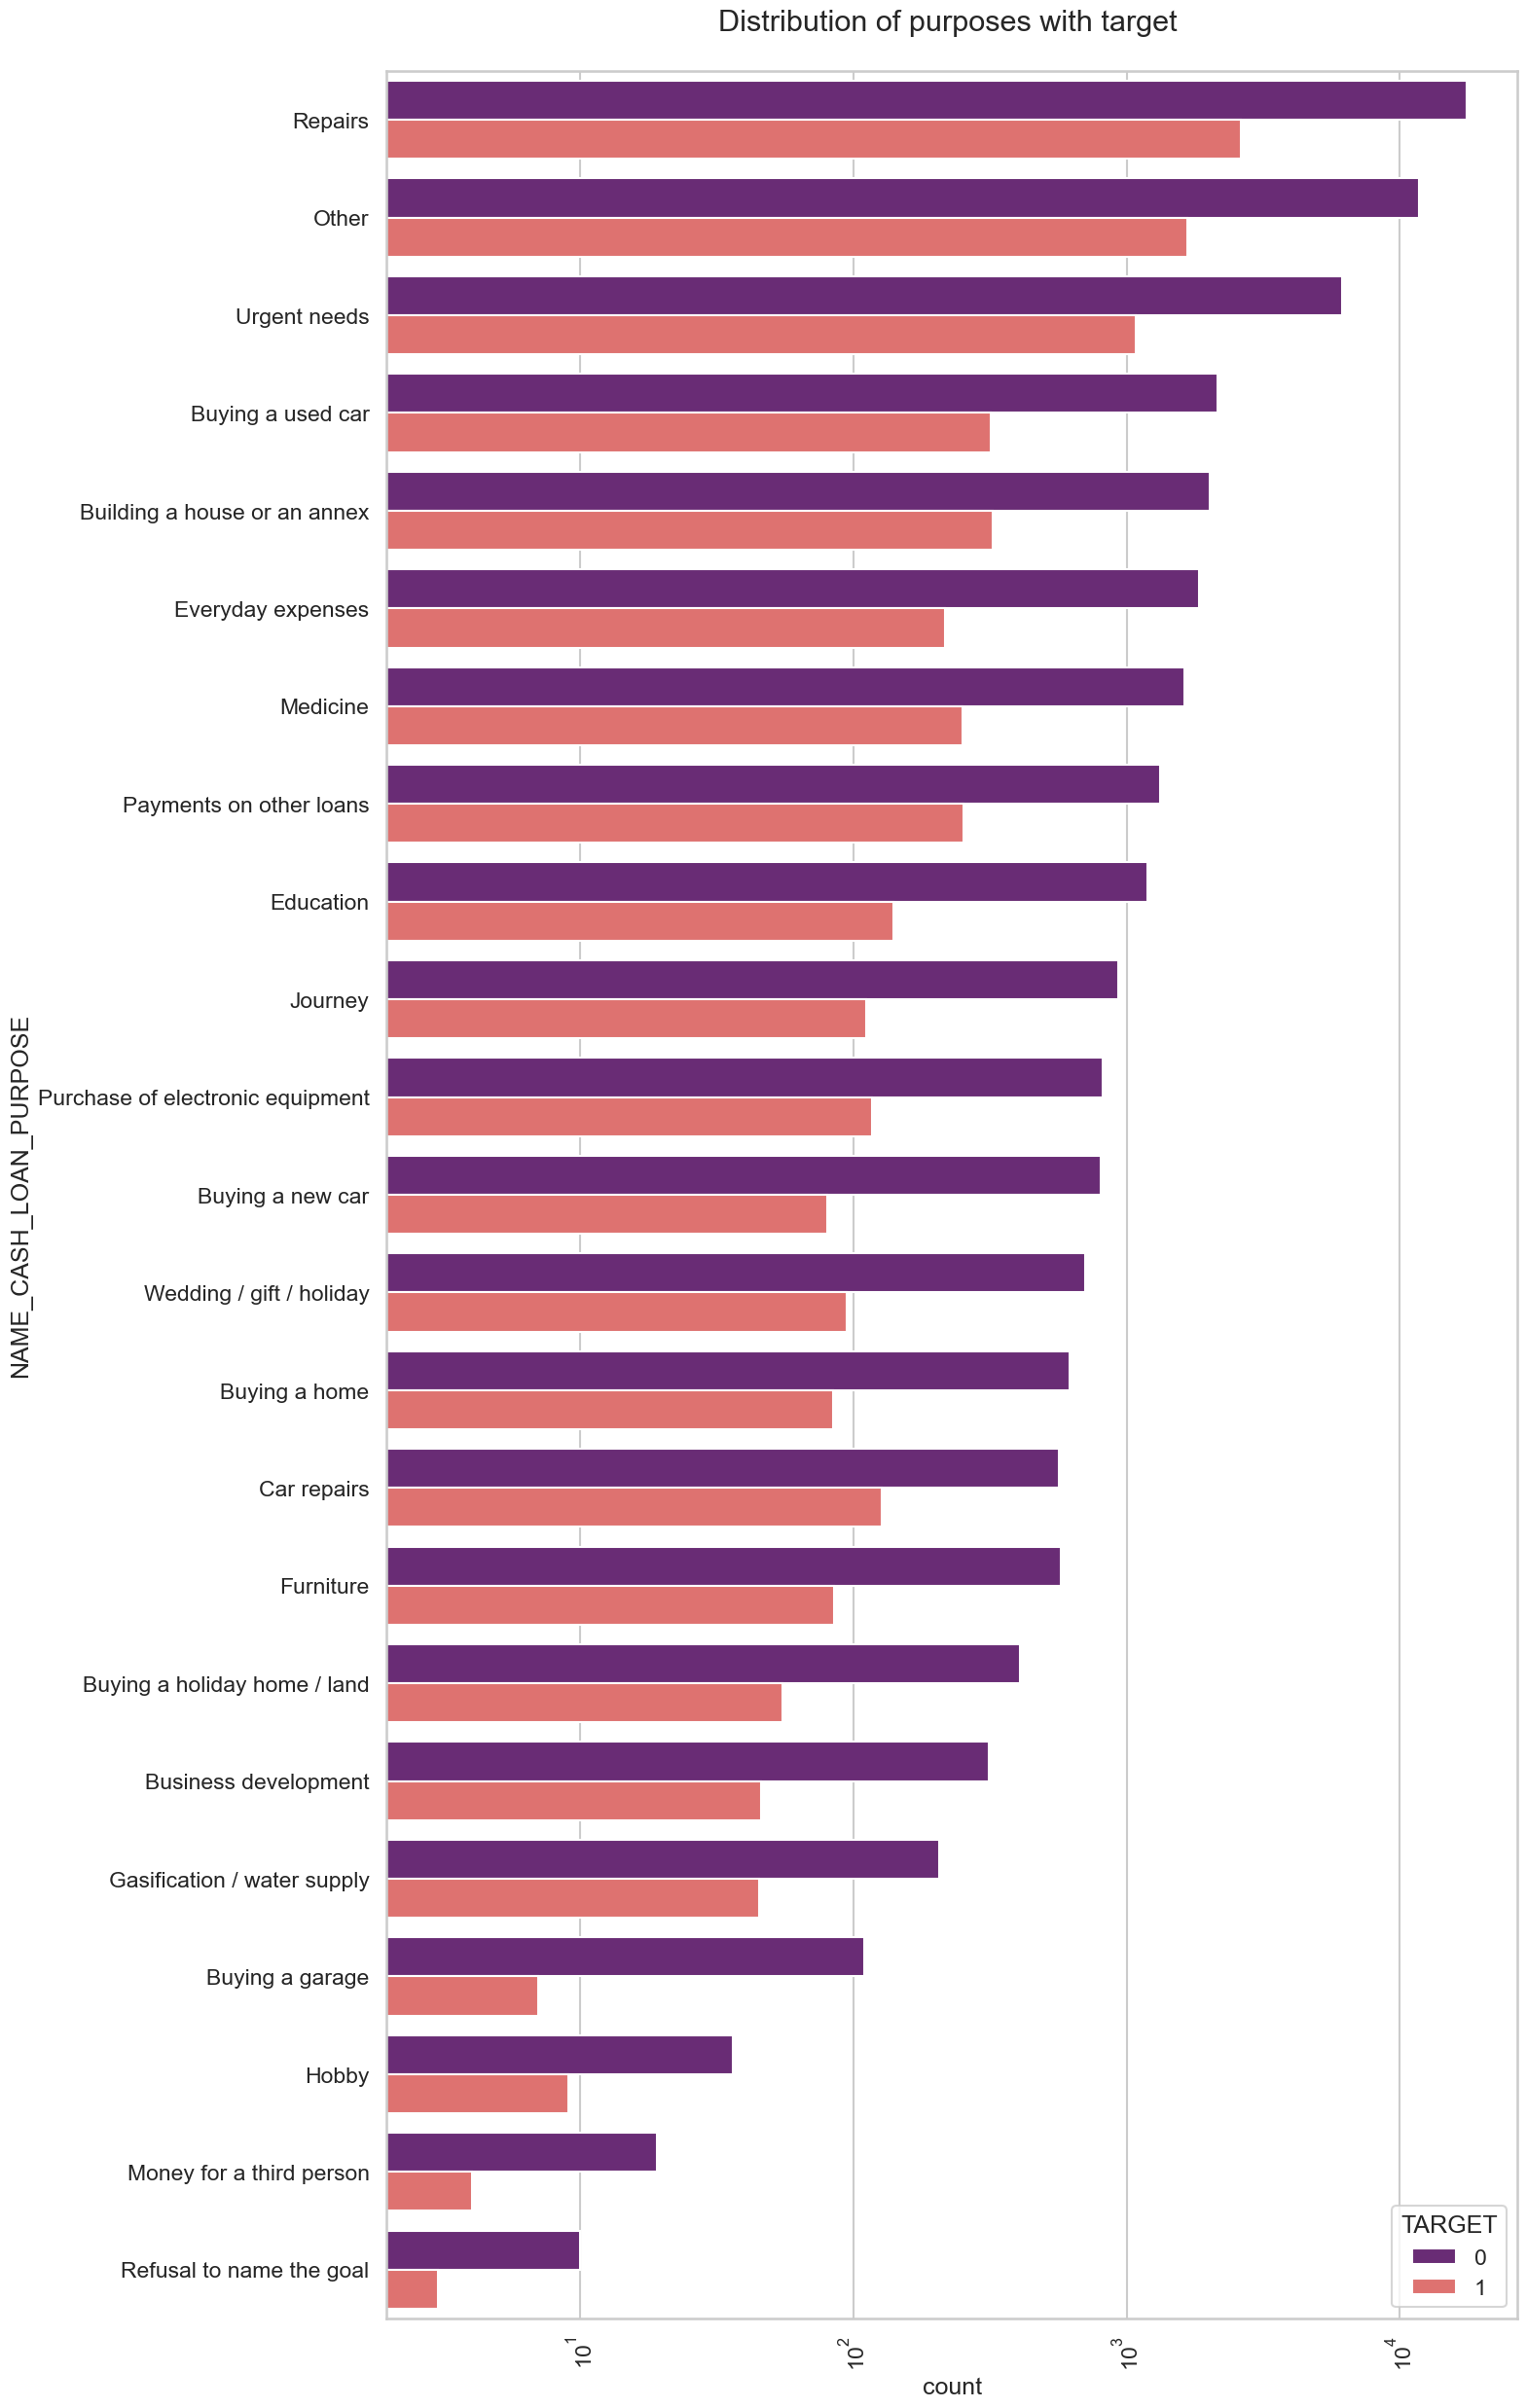

In [64]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

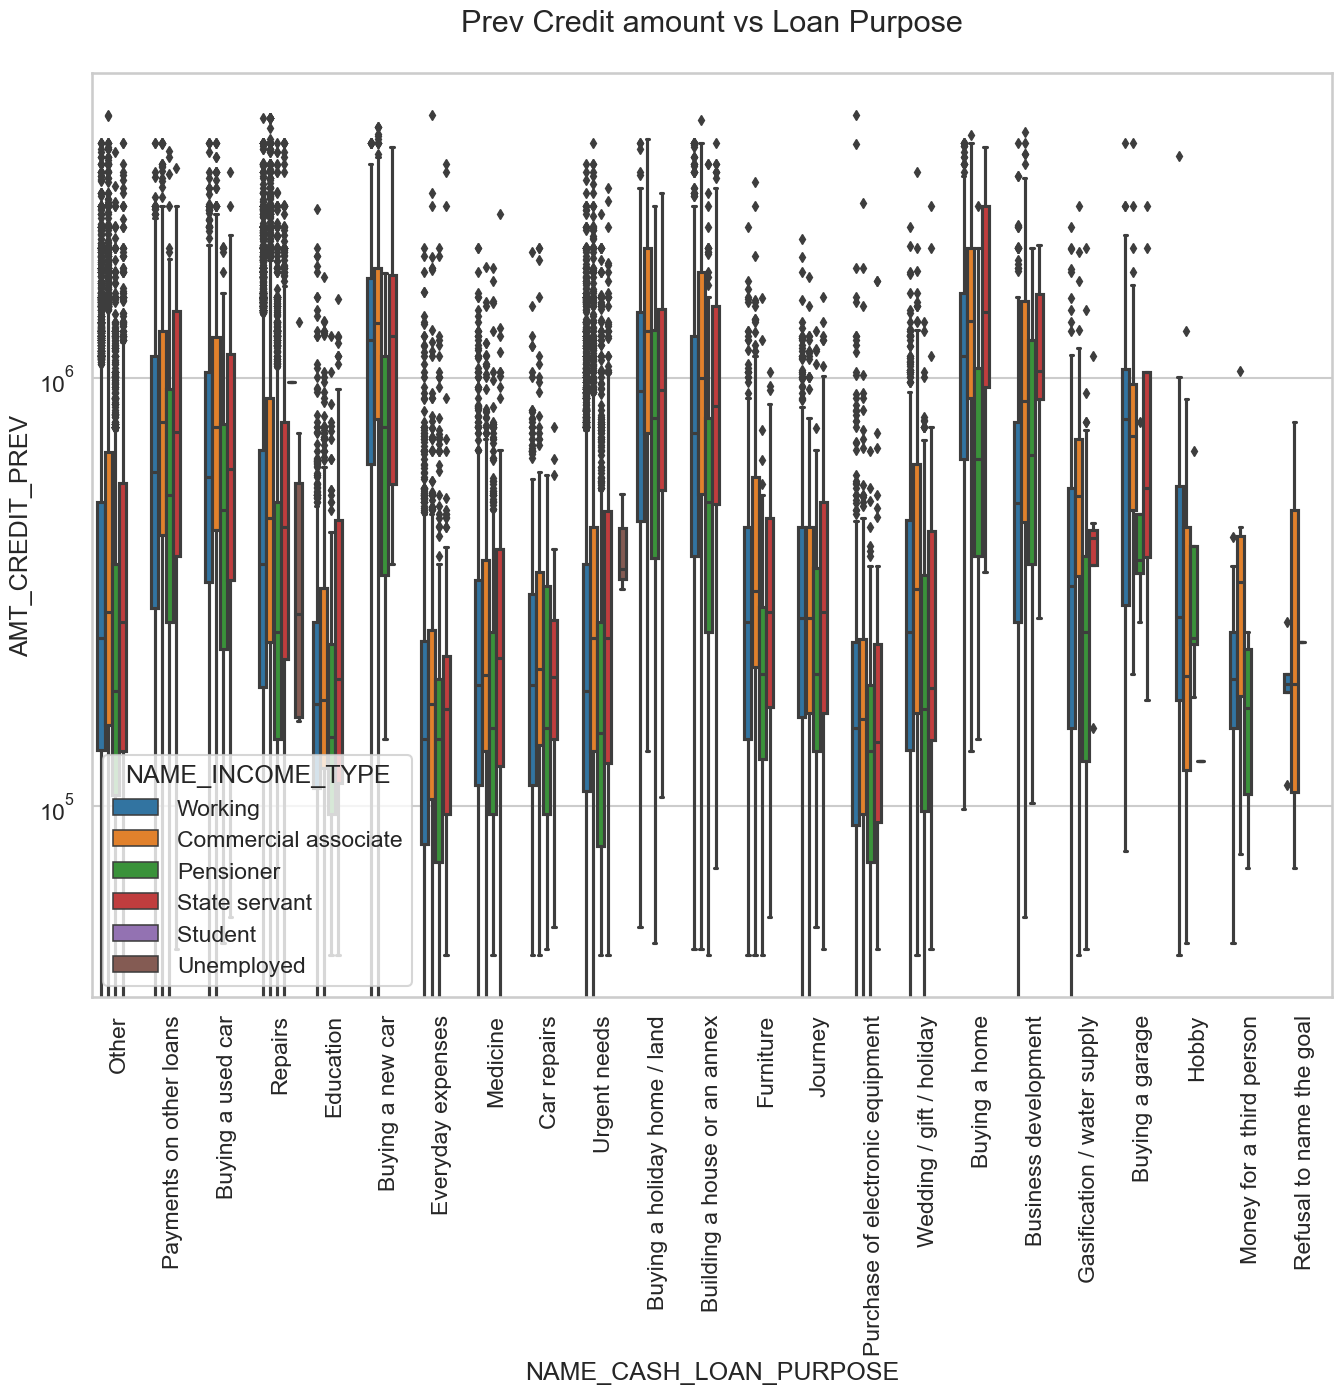

In [65]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points-

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

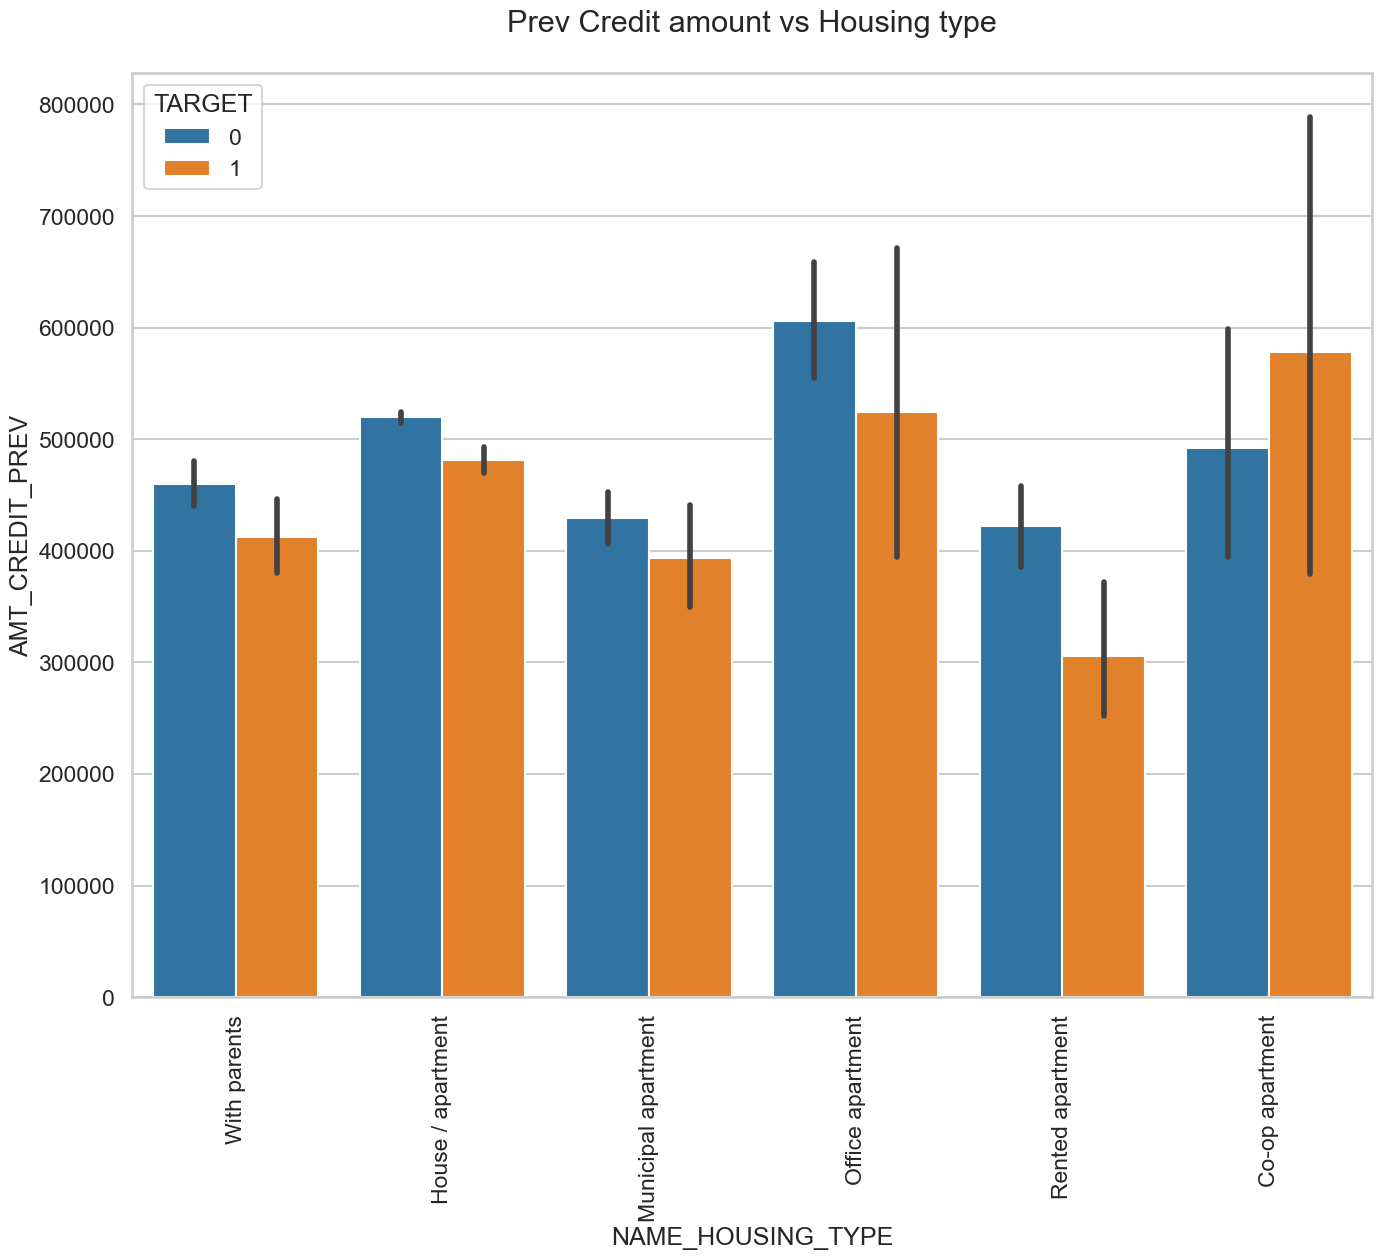

In [66]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# CONCLUSION

**1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other
     than ‘Co-op apartment’ for successful payments.**

**2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.**

**3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.**

**4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.**
